in beta for now

In [2]:
from sklearn.impute import KNNImputer
import pandas as pd
df = pd.read_csv("flights.csv")

import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display results
print("Missing Values:\n", missing_values)
print("\nMissing Values (%):\n", missing_percentage)

Missing Values:
 id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

Missing Values (%):
 id                0.000000
year              0.000000
month             0.000000
day               0.000000
dep_time          2.451184
sched_dep_time    0.000000
dep_delay         2.451184
arr_time          2.587180
sched_arr_time    0.000000
arr_delay         2.800081
carrier           0.000000
flight            0.000000
tailnum           0.745896
origin            0.000000
dest              0.000000
air_time          2.800081
distance          0.000000
hour  

In [3]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Display results
print("Number of duplicate rows:", duplicates)

# Drop duplicates (if needed)
df = df.drop_duplicates()

Number of duplicate rows: 0


In [4]:
# Check for unique values in categorical columns
print("Unique values in 'tailnum':", df['tailnum'].unique())
print("Unique values in 'carrier':", df['carrier'].unique())

# Check for invalid values in numerical columns
print("Invalid 'dep_time' values:", df[df['dep_time'] < 0]['dep_time'].unique())
print("Invalid 'distance' values:", df[df['distance'] < 0]['distance'].unique())

Unique values in 'tailnum': ['N14228' 'N24211' 'N619AA' ... 'N776SK' 'N785SK' 'N557AS']
Unique values in 'carrier': ['UA' 'AA' 'B6' 'DL' 'EV' 'MQ' 'US' 'WN' 'VX' 'FL' 'AS' '9E' 'F9' 'HA'
 'YV' 'OO']
Invalid 'dep_time' values: []
Invalid 'distance' values: []


In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv('flights.csv')

# Count the number of missing values per row
df['missing_count'] = df.isnull().sum(axis=1)

# Filter rows with multiple missing attributes (e.g., 2 or more)
rows_with_multiple_missing = df[df['missing_count'] >= 2]

# Print these rows
print("Rows with multiple missing attributes:")
print(rows_with_multiple_missing)

Rows with multiple missing attributes:
            id  year  month  day  dep_time  sched_dep_time  dep_delay  \
471        471  2013      1    1    1525.0            1530       -5.0   
477        477  2013      1    1    1528.0            1459       29.0   
615        615  2013      1    1    1740.0            1745       -5.0   
643        643  2013      1    1    1807.0            1738       29.0   
725        725  2013      1    1    1939.0            1840       59.0   
...        ...   ...    ...  ...       ...             ...        ...   
336771  336771  2013      9   30       NaN            1455        NaN   
336772  336772  2013      9   30       NaN            2200        NaN   
336773  336773  2013      9   30       NaN            1210        NaN   
336774  336774  2013      9   30       NaN            1159        NaN   
336775  336775  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay  ... tailnum  origin dest  \
471       1

In [6]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('flights.csv')

# Create the 'flight_status' column
df['flight_status'] = np.where(
    df['dep_time'].isnull(), 'cancelled',  # If dep_time is NaN, flight is cancelled
    np.where(
        df['arr_time'].isnull(), 'incomplete',  # If arr_time is NaN, flight is incomplete
        'completed'  # Otherwise, flight is completed
    )
)

# Check the distribution of flight_status
print(df['flight_status'].value_counts())


flight_status
completed     328063
cancelled       8255
incomplete       458
Name: count, dtype: int64


In [7]:
# Fill missing tailnum with 'private'
df['tailnum'].fillna('private', inplace=True)

# Check the distribution of tailnum
print(df['tailnum'].value_counts())

tailnum
private    2512
N725MQ      575
N722MQ      513
N723MQ      507
N711MQ      486
           ... 
N7ASAA        1
N932DN        1
N318AS        1
N651UA        1
N557AS        1
Name: count, Length: 4044, dtype: int64


C:\Users\Eric\AppData\Local\Temp\ipykernel_22176\373628596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tailnum'].fillna('private', inplace=True)


In [8]:
import pandas as pd
import numpy as np

# Load your dataset
# df = pd.read_csv('flights.csv')

# Create a deep copy of the DataFrame
df_cleaned = df.copy(deep=True)

# Replace non-standard missing values with np.nan
df_cleaned.replace([-999, 'NA', ''], np.nan, inplace=True)

# Define numerical columns
numerical_columns = ['dep_delay', 'arr_delay', 'air_time', 'dep_time', 'arr_time']

# Convert these columns to numeric (in case they are read as strings)
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Create the 'flight_status' column:
# - If dep_time is NaN, the flight is 'cancelled'
# - Else if arr_time is NaN, the flight is 'incomplete'
# - Otherwise, the flight is 'completed'
df_cleaned['flight_status'] = np.where(
    df_cleaned['dep_time'].isnull(), 'cancelled',
    np.where(df_cleaned['arr_time'].isnull(), 'incomplete', 'completed')
)

# Fill missing tailnum values with 'private'
df_cleaned['tailnum'] = df_cleaned['tailnum'].fillna('private')

# Replace NaNs with 0 in numerical columns for flights marked as 'completed'
for col in numerical_columns:
    df_cleaned.loc[df_cleaned['flight_status'] == 'completed', col] = (
        df_cleaned.loc[df_cleaned['flight_status'] == 'completed', col].fillna(0)
    )

# Additionally, fill remaining NaNs in all numerical columns across all flight statuses with 0
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(0)

# Debug: Print any rows that still have missing values
missing_rows = df_cleaned[df_cleaned.isnull().any(axis=1)]
if not missing_rows.empty:
    print("Rows with remaining missing values:")
    print(missing_rows)
else:
    print("No remaining missing values in the dataset.")

# Verify that NaNs are replaced for numerical columns
print("\nMissing values after replacement:")
print(df_cleaned[numerical_columns].isnull().sum())

# Check the distribution of numerical columns after replacement
print("\nNumerical Columns after replacement:")
print(df_cleaned[numerical_columns].describe())


No remaining missing values in the dataset.

Missing values after replacement:
dep_delay    0
arr_delay    0
air_time     0
dep_time     0
arr_time     0
dtype: int64

Numerical Columns after replacement:
           dep_delay      arr_delay       air_time       dep_time  \
count  336776.000000  336776.000000  336776.000000  336776.000000   
mean       12.329263       6.702301     146.467118    1316.040778   
std        39.762251      44.018670      95.654155     525.447907   
min       -43.000000     -86.000000       0.000000       0.000000   
25%        -5.000000     -16.000000      78.000000     854.000000   
50%        -1.000000      -4.000000     126.000000    1349.000000   
75%        10.000000      13.000000     188.000000    1737.000000   
max      1301.000000    1272.000000     695.000000    2400.000000   

            arr_time  
count  336776.000000  
mean     1463.194138  
std       577.818818  
min         0.000000  
25%      1047.000000  
50%      1518.000000  
75%      193

In [9]:
# Filter rows where flight_status is 'completed'
completed_flights = df_cleaned[df_cleaned['flight_status'] == 'completed']

# Count the number of rows where air_time is 0
zero_air_time_count = completed_flights[completed_flights['air_time'] == 0].shape[0]

# Print the result
print(f"Number of 'completed' flights with air_time = 0: {zero_air_time_count}")

Number of 'completed' flights with air_time = 0: 717


In [10]:
# Calculate air_time using dep_time and arr_time for the filtered flights where air_time is 0, dep_time and arr_time are not 0
filtered_flights = df_cleaned[
    (df_cleaned['flight_status'] == 'completed') &
    (df_cleaned['air_time'] == 0)
]

df_cleaned.loc[filtered_flights.index, 'air_time'] = (filtered_flights['arr_time'] - filtered_flights['dep_time']).clip(lower=0)

print(df_cleaned[
    (df_cleaned['flight_status'] == 'completed') &
    (df_cleaned['dep_time'] != 0) &
    (df_cleaned['arr_time'] != 0)
]['air_time'].value_counts())


air_time
42.0     2552
43.0     2543
41.0     2513
45.0     2495
40.0     2466
         ... 
519.0       1
774.0       1
799.0       1
782.0       1
786.0       1
Name: count, Length: 675, dtype: int64


In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Prepare the data
# Filter only completed flights
completed_flights = df_cleaned[df_cleaned['flight_status'] == 'completed']

# Separate rows where air_time = 0 (to be imputed) and air_time > 0 (to train the model)
flights_to_impute = completed_flights[completed_flights['air_time'] == 0]
flights_with_air_time = completed_flights[completed_flights['air_time'] > 0]

# Step 2: Select features for KNN
# Choose relevant features (e.g., distance, dep_time, arr_time, dep_delay, arr_delay)
features = ['distance', 'dep_time', 'arr_time', 'dep_delay', 'arr_delay']

# Extract the feature matrix for training and imputation
X_train = flights_with_air_time[features]  # Features for training
y_train = flights_with_air_time['air_time']  # Target for training
X_impute = flights_to_impute[features]  # Features for imputation

# Step 3: Standardize the features (KNN is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_impute_scaled = scaler.transform(X_impute)

# Step 4: Train the KNN model and impute air_time
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data (only X_train_scaled)
imputer.fit(X_train_scaled)

# Impute air_time for rows with air_time = 0
imputed_data = imputer.transform(X_impute_scaled)

# The imputed_data will have the same number of features as X_train_scaled (5 features)
# Since we are imputing air_time, we need to map the imputed values back to the original dataset

# Step 5: Update the dataset
# Replace air_time = 0 with the imputed values
df_cleaned.loc[flights_to_impute.index, 'air_time'] = imputed_data[:, -1]  # Use the last column as the imputed air_time

# Ensure air_time is not less than 0
df_cleaned = df_cleaned[df_cleaned['air_time'] > 0]

# Verify that air_time = 0 has been replaced
print("\nNumber of 'completed' flights with air_time = 0 after imputation:",
      df_cleaned[(df_cleaned['flight_status'] == 'completed') & (df_cleaned['air_time'] == 0)].shape[0])


Number of 'completed' flights with air_time = 0 after imputation: 0


In [12]:
print(df_cleaned[df_cleaned['flight_status'] == 'completed']['air_time'].describe())

count    327966.000000
mean        151.353659
std          95.034562
min          20.000000
25%          82.000000
50%         130.000000
75%         192.000000
max        1170.000000
Name: air_time, dtype: float64


In [13]:
import os

# Step 1: Separate the rows for incomplete and cancelled flights
incomplete_flights = df_cleaned[df_cleaned['flight_status'] == 'incomplete']
cancelled_flights = df_cleaned[df_cleaned['flight_status'] == 'cancelled']

# Step 2: Combine the completed, incomplete, and cancelled flights back into a single DataFrame
df_flights_EDA = pd.concat([completed_flights, incomplete_flights, cancelled_flights], axis=0)

# Step 3: Verify the final dataset
print("\nFinal Dataset Shape:", df_flights_EDA.shape)
print("\nFlight Status Distribution in Final Dataset:")
print(df_flights_EDA['flight_status'].value_counts())

# Step 4: Add total delay time, and delay status
df_flights_EDA['total_delay'] = df_flights_EDA['dep_delay'] + df_flights_EDA['arr_delay']

# Step 5: Check for missing values in the final dataset
print("\nMissing values in the final dataset:")
print(df_flights_EDA.isnull().sum())

# Step 6: Save the final dataset to a CSV file only if it does not already exist
file_path = 'flights_EDA.csv'
if not os.path.exists(file_path):
    df_flights_EDA.to_csv(file_path, index=False)
    print("\nThe dataset has been saved as 'flights_EDA.csv'.")
else:
    print("\nThe file 'flights_EDA.csv' already exists. No new file was created.")


Final Dataset Shape: (328063, 22)

Flight Status Distribution in Final Dataset:
flight_status
completed    328063
Name: count, dtype: int64

Missing values in the final dataset:
id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
flight_status     0
total_delay       0
dtype: int64

The file 'flights_EDA.csv' already exists. No new file was created.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flights_EDA.csv')

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

print("\nFlight Status Distribution:")
print(df['flight_status'].value_counts())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328063 entries, 0 to 328062
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              328063 non-null  int64  
 1   year            328063 non-null  int64  
 2   month           328063 non-null  int64  
 3   day             328063 non-null  int64  
 4   dep_time        328063 non-null  float64
 5   sched_dep_time  328063 non-null  int64  
 6   dep_delay       328063 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  328063 non-null  int64  
 9   arr_delay       328063 non-null  float64
 10  carrier         328063 non-null  object 
 11  flight          328063 non-null  int64  
 12  tailnum         328063 non-null  object 
 13  origin          328063 non-null  object 
 14  dest            328063 non-null  object 
 15  air_time        328063 non-null  float64
 16  distance        328063 non-null  int64

<Figure size 1200x600 with 0 Axes>

In [15]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
flight_status     0
total_delay       0
dtype: int64


C:\Users\Eric\AppData\Local\Temp\ipykernel_22176\1911218953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_plot, data=df, palette='viridis')


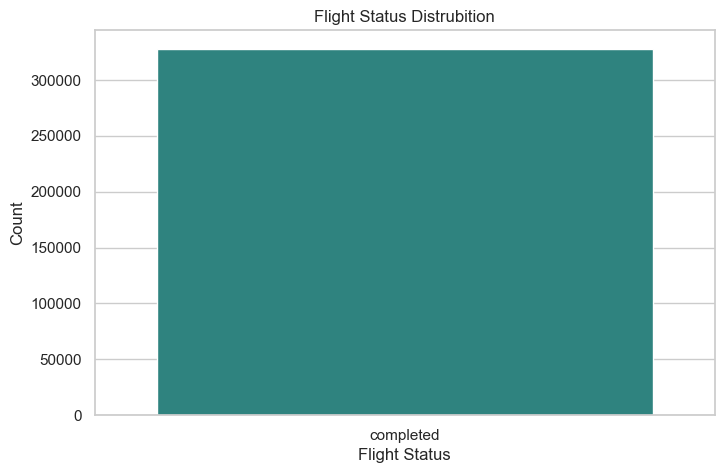

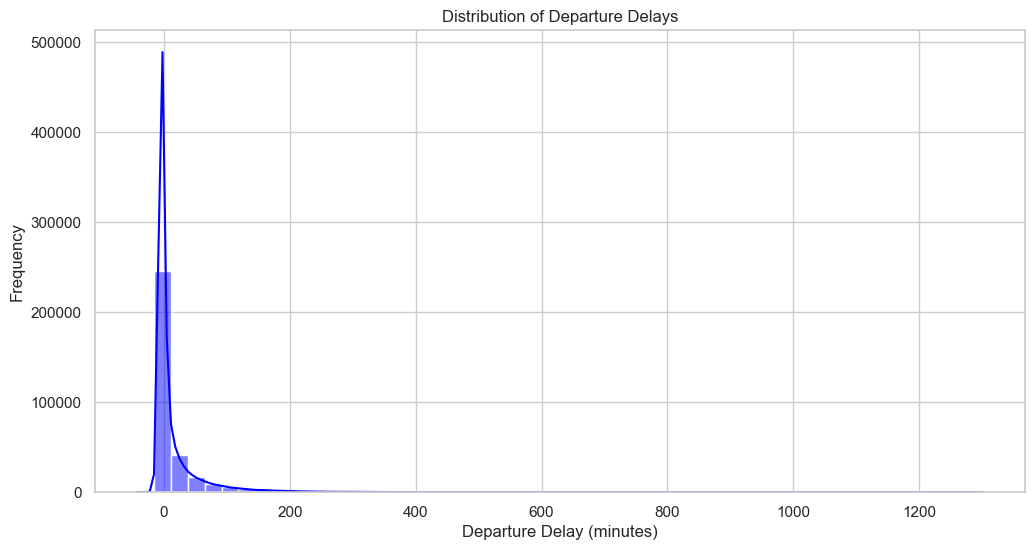

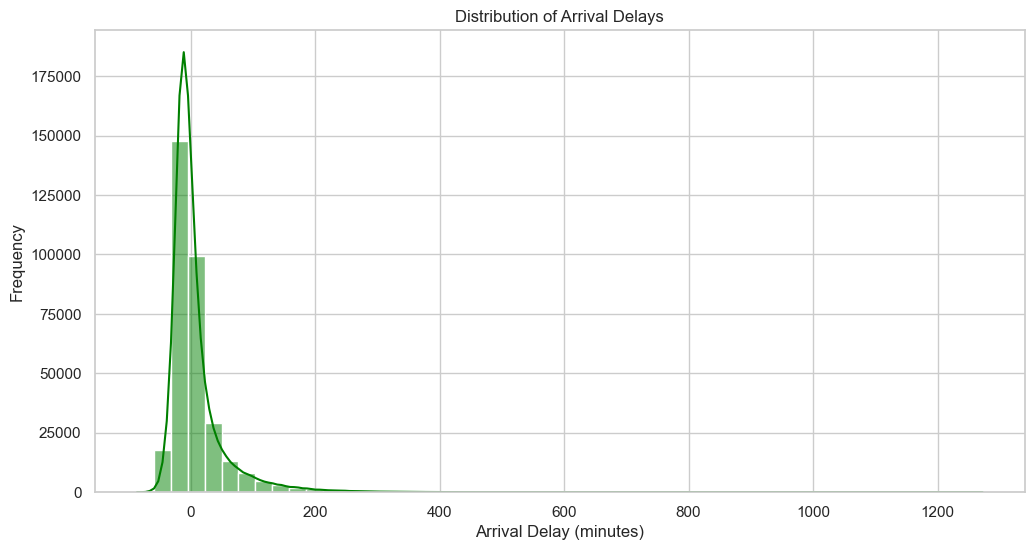

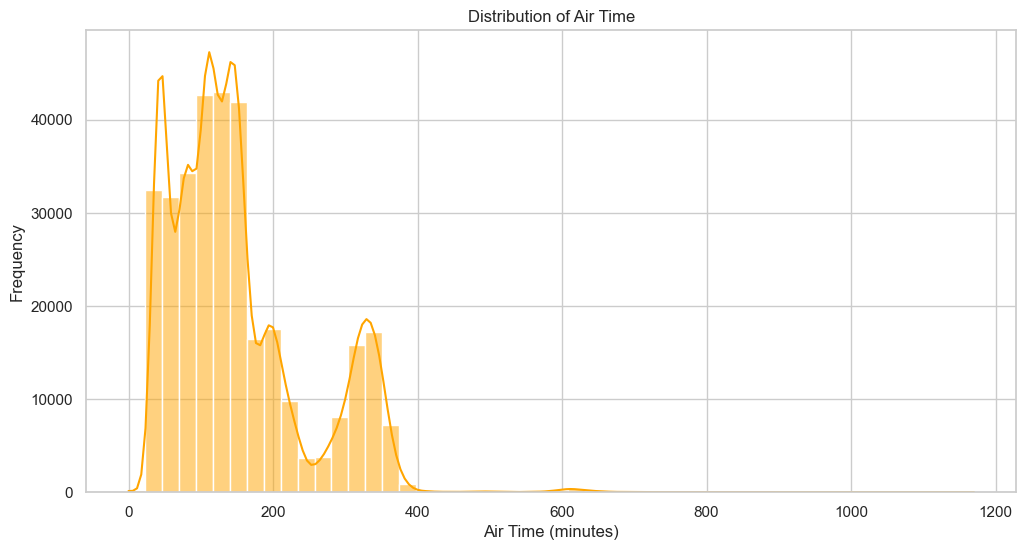

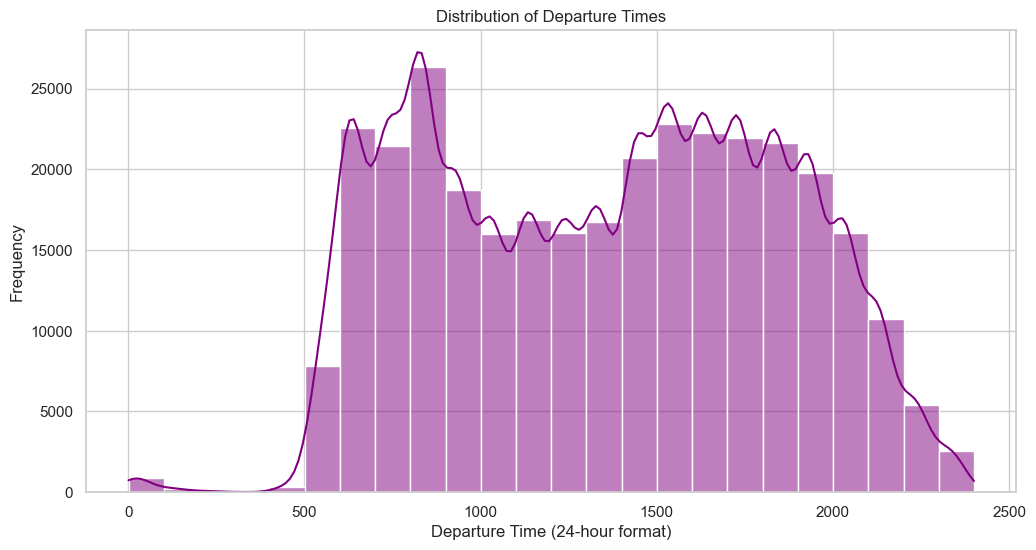

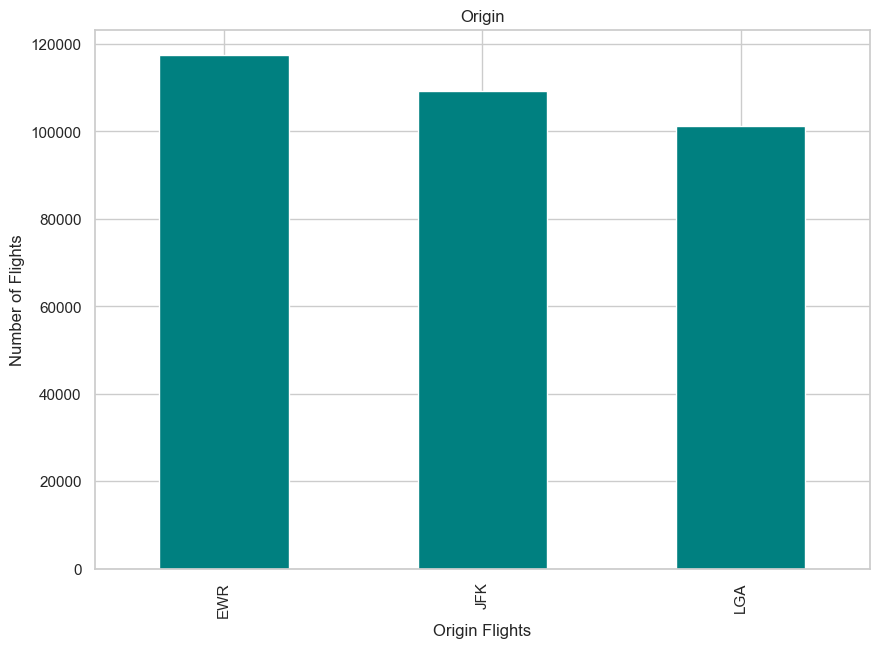

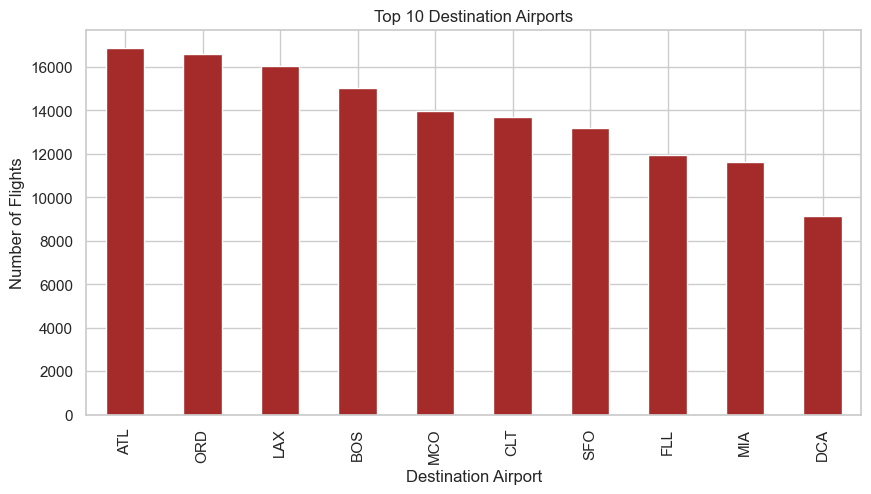

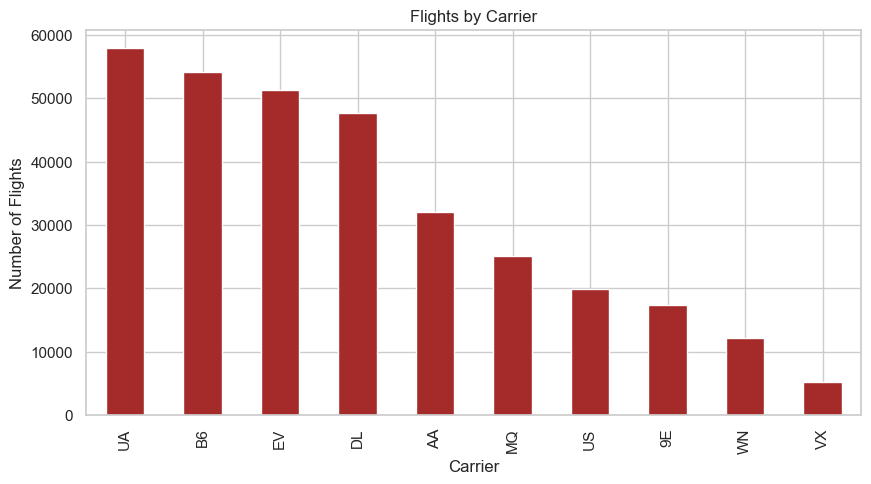

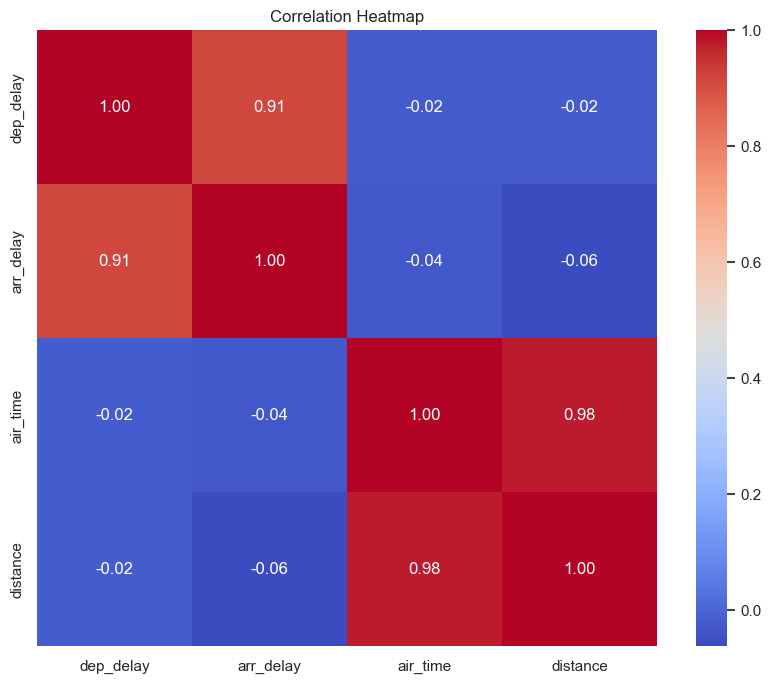

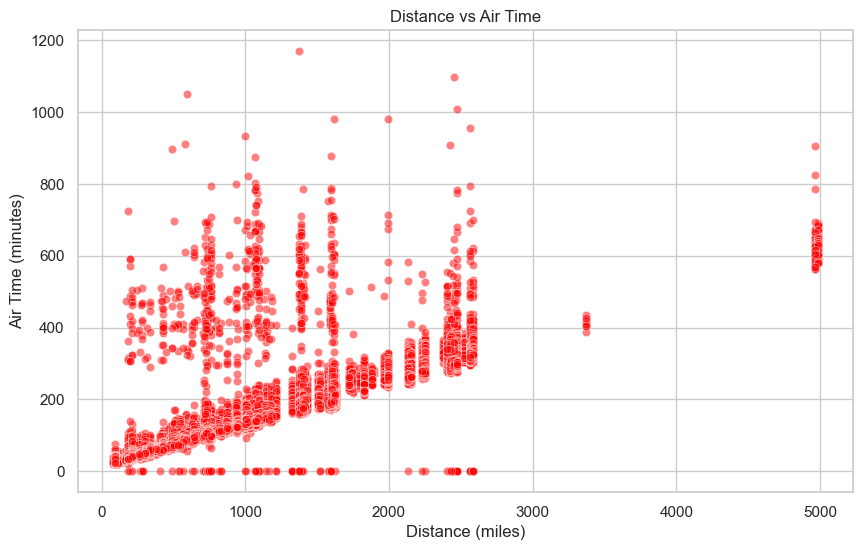

In [16]:
# function to plot count plots
def countPlot(df, fig_x, fig_y, x_plot, title, xlabel, ylabel):
  plt.figure(figsize=(fig_x, fig_y))
  sns.countplot(x=x_plot, data=df, palette='viridis')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# function to create a histogram
def histogramPlot(df, num_bins, fig_x, fig_y, x_plot, title, xlabel, ylabel, plotcolor):
  plt.figure(figsize=(fig_x, fig_y))
  sns.histplot(df[x_plot], bins=num_bins, kde=True, color=plotcolor)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# function to create a bargraph
def bargraphPlot(df, num_bars, fig_x, fig_y, x_plot, title, xlabel, ylabel, plotcolor):
  plt.figure(figsize=(fig_x, fig_y))
  df[x_plot].value_counts().head(num_bars).plot(kind='bar', color=plotcolor)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def scatterPlot(df, fig_x, fig_y, x_plot, y_plot, title, xlabel, ylabel, plotcolor):
  plt.figure(figsize=(fig_x, fig_y))
  sns.scatterplot(x=x_plot, y=y_plot, data=df, alpha=0.5, color='red')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

countPlot(df, 8, 5, 'flight_status', 'Flight Status Distrubition', 'Flight Status', 'Count') # the number of Complete, incomplete, and cancelled flights
histogramPlot(df, 50, 12, 6, 'dep_delay', 'Distribution of Departure Delays', 'Departure Delay (minutes)', 'Frequency', 'Blue') # the distribution of departure delayed flights on a histogram
histogramPlot(df, 50, 12, 6, 'arr_delay', 'Distribution of Arrival Delays', 'Arrival Delay (minutes)', 'Frequency', 'Green') # the distribution of arrival delay flights on a histogram
histogramPlot(df, 50, 12, 6, 'air_time', 'Distribution of Air Time', 'Air Time (minutes)', 'Frequency', 'Orange') # the distribution of air times on a histogram
histogramPlot(df, 24, 12, 6, 'dep_time', 'Distribution of Departure Times', 'Departure Time (24-hour format)', 'Frequency', 'Purple') # the distribution of departure times on a histogram
bargraphPlot(df, 10, 10, 7, 'origin', 'Origin', 'Origin Flights', 'Number of Flights', 'Teal') # the distribution of departure times on a histogram
bargraphPlot(df, 10, 10, 5, 'dest', 'Top 10 Destination Airports', 'Destination Airport', 'Number of Flights', 'Brown') # the distribution of departure times on a histogram
bargraphPlot(df, 10, 10, 5, 'carrier', 'Flights by Carrier', 'Carrier', 'Number of Flights', 'Brown') # carrier number of flights

# correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['dep_delay', 'arr_delay', 'air_time', 'distance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# scatter plot distance vs air time
scatterPlot(df, 10, 6, 'distance', 'air_time', 'Distance vs Air Time', 'Distance (miles)', 'Air Time (minutes)', 'Red')

C:\Users\Eric\AppData\Local\Temp\ipykernel_22176\1911218953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_plot, data=df, palette='viridis')


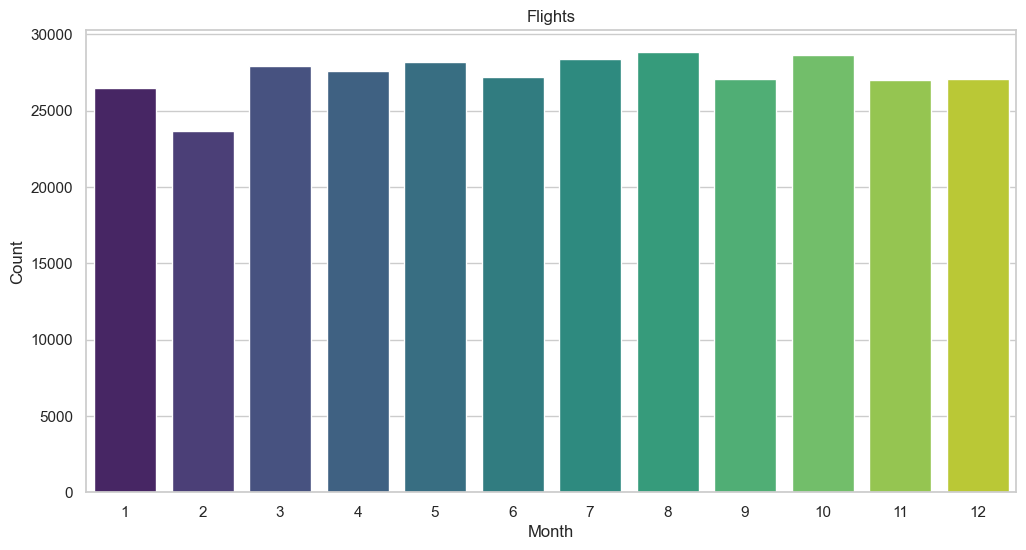

C:\Users\Eric\AppData\Local\Temp\ipykernel_22176\1911218953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_plot, data=df, palette='viridis')


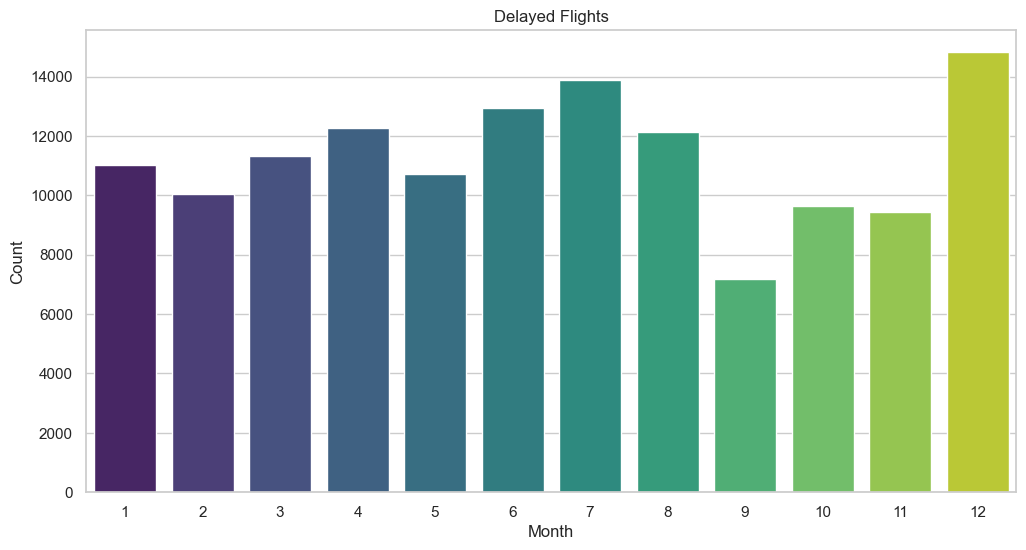

C:\Users\Eric\AppData\Local\Temp\ipykernel_22176\1911218953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_plot, data=df, palette='viridis')


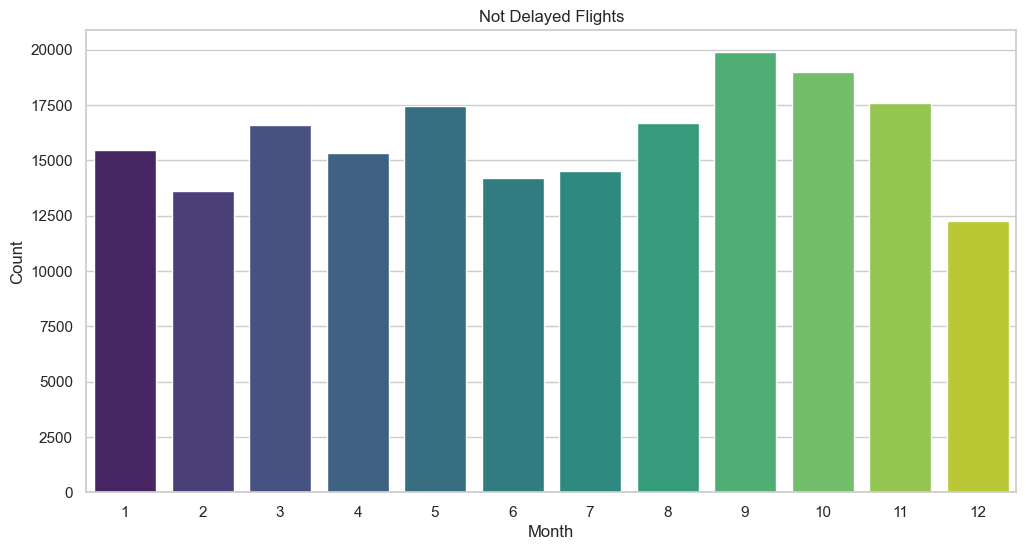

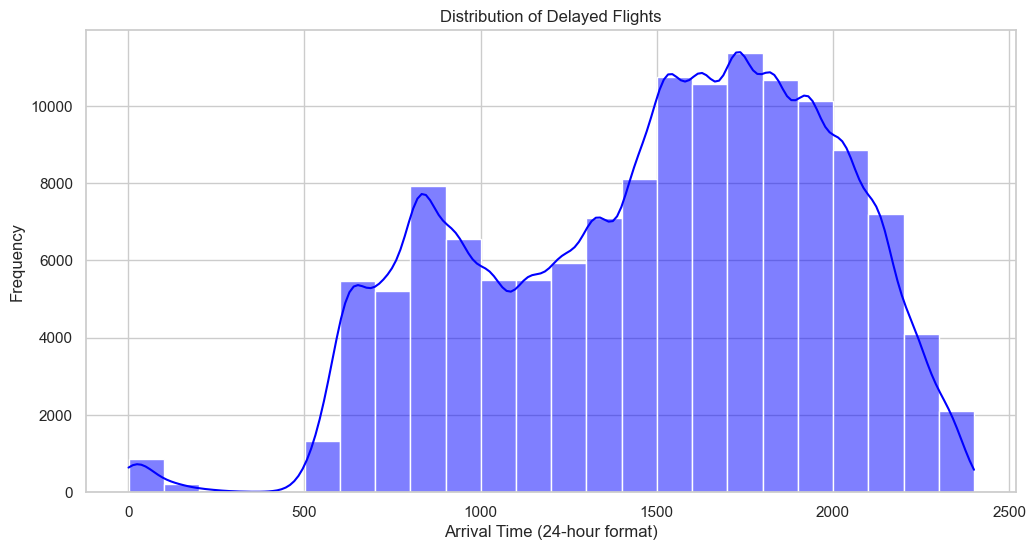

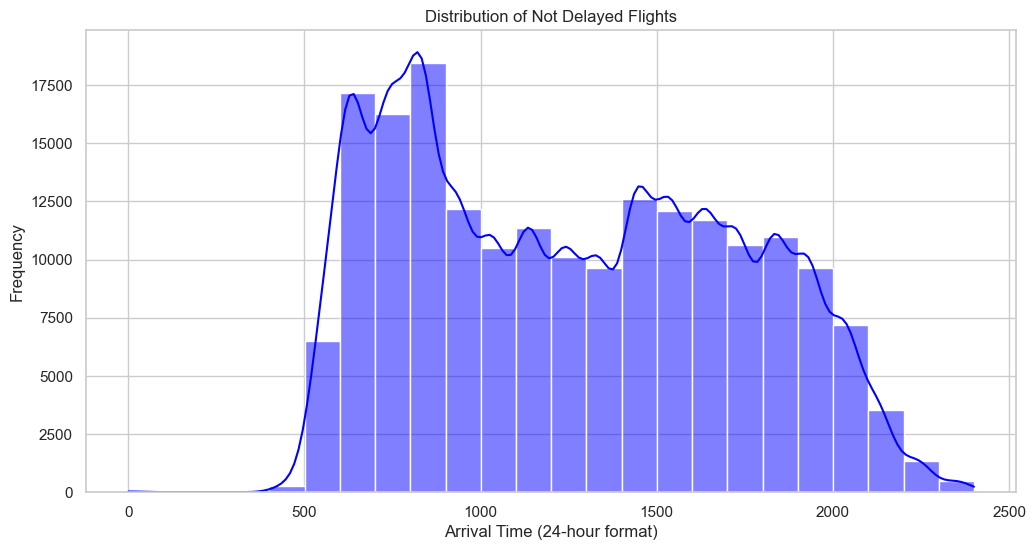

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_delayed = df[df['total_delay'] > 0]
df_not_delayed = df[df['total_delay'] <= 0]

countPlot(df, 12, 6, 'month', 'Flights', 'Month', 'Count') # Number of all flights per month
countPlot(df_delayed, 12, 6, 'month', 'Delayed Flights', 'Month', 'Count') # Number of delayed flights per month
countPlot(df_not_delayed, 12, 6, 'month', 'Not Delayed Flights', 'Month', 'Count') # Number of not delayed flights per month

histogramPlot(df_delayed, 24, 12, 6, 'dep_time', 'Distribution of Delayed Flights', 'Arrival Time (24-hour format)', 'Frequency', 'Blue') # distribution of delayed flights
histogramPlot(df_not_delayed, 24, 12, 6, 'dep_time', 'Distribution of Not Delayed Flights', 'Arrival Time (24-hour format)', 'Frequency', 'Blue') # distrubiton of not delayed flights


In [18]:
df_all_month_flights = df.groupby('month')['total_delay'].count()
df_all_month_delayed_flights = df[df['total_delay'] > 0].groupby('month')['total_delay'].count()

month_percentage_delays = df_all_month_delayed_flights / df_all_month_flights
print(month_percentage_delays)

month
1     0.416012
2     0.423880
3     0.405576
4     0.444280
5     0.380741
6     0.476795
7     0.489254
8     0.420492
9     0.265571
10    0.336813
11    0.349435
12    0.547348
Name: total_delay, dtype: float64


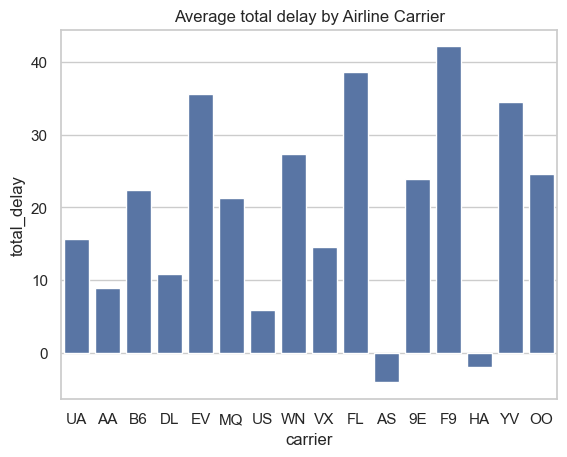

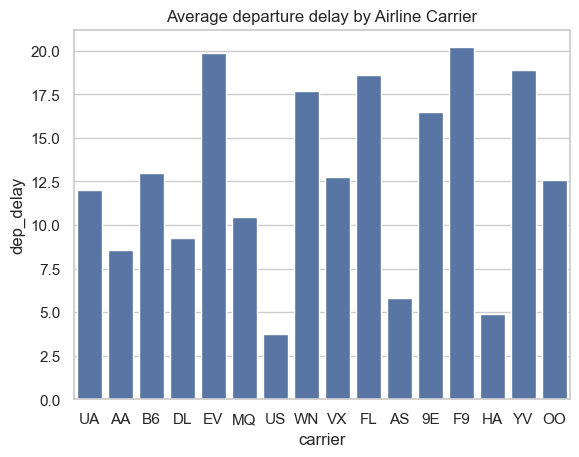

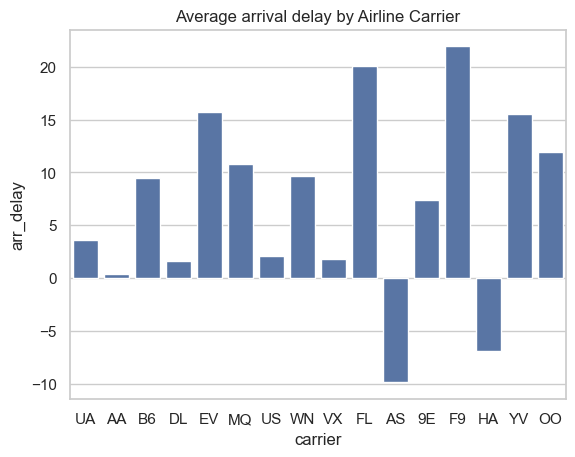

In [19]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('flights_EDA.csv')

carrier_total_delay = df.groupby('carrier')['total_delay'].mean().reset_index()
carrier_dept_delay = df.groupby('carrier')['dep_delay'].mean().reset_index()
carrier_arr_delay = df.groupby('carrier')['arr_delay'].mean().reset_index()

def barPlot(x_label, y_label, title):
  sns.barplot(x=x_label, y=y_label, data=df, errorbar=None)
  plt.title(title)
  plt.show()

# print(carrier_total_delay)
# print(carrier_dept_delay)
# print(carrier_arr_delay)

barPlot('carrier', 'total_delay', 'Average total delay by Airline Carrier')
barPlot('carrier', 'dep_delay', 'Average departure delay by Airline Carrier')
barPlot('carrier', 'arr_delay', 'Average arrival delay by Airline Carrier')


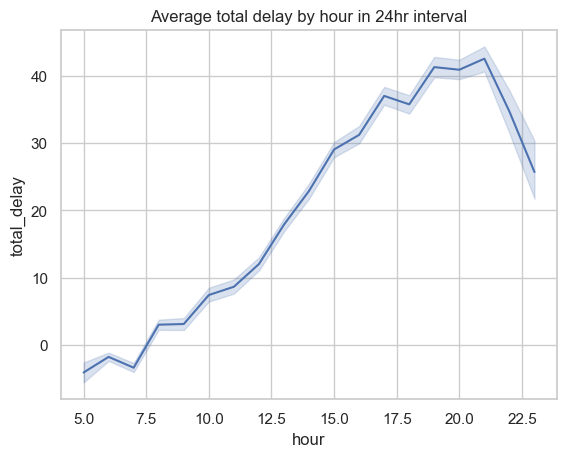

In [20]:

df['hour'] = pd.to_datetime(df['time_hour']).dt.hour
sns.lineplot(x='hour', y='total_delay', data= df)
plt.title('Average total delay by hour in 24hr interval')
plt.show()


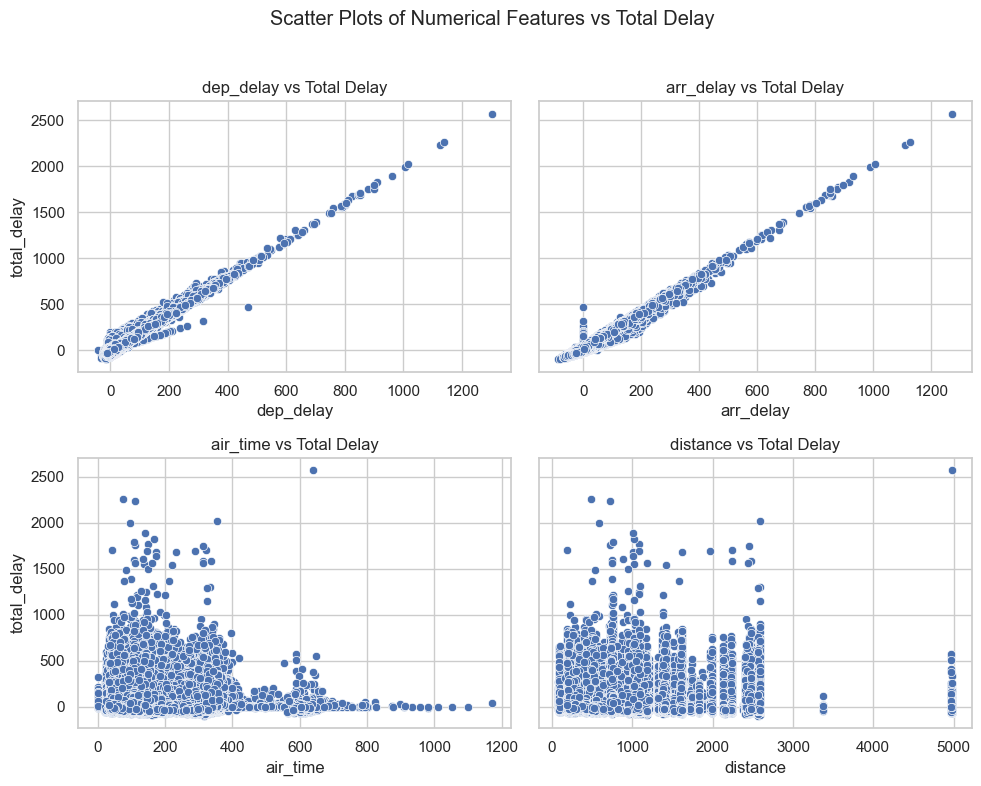

In [21]:
import seaborn as sns

# Select numerical features and the target variable
numerical_features = ['dep_delay', 'arr_delay', 'air_time', 'distance', 'total_delay']
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features and the target variable
numerical_features = ['dep_delay', 'arr_delay', 'air_time', 'distance', 'total_delay']

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharey=True)
fig.suptitle('Scatter Plots of Numerical Features vs Total Delay')

# Function to create scatter plots in subplots
def create_subplots(data, x_column, y_column, title, ax):
    sns.scatterplot(data=data, x=x_column, y=y_column, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)

# Create scatter plots for each numerical feature (excluding the target variable itself)
for i, col in enumerate(numerical_features[:-1]):  # Exclude 'total_delay' from the loop
    row = i // 2
    col_num = i % 2
    create_subplots(df, col, 'total_delay', f'{col} vs Total Delay', axes[row, col_num])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

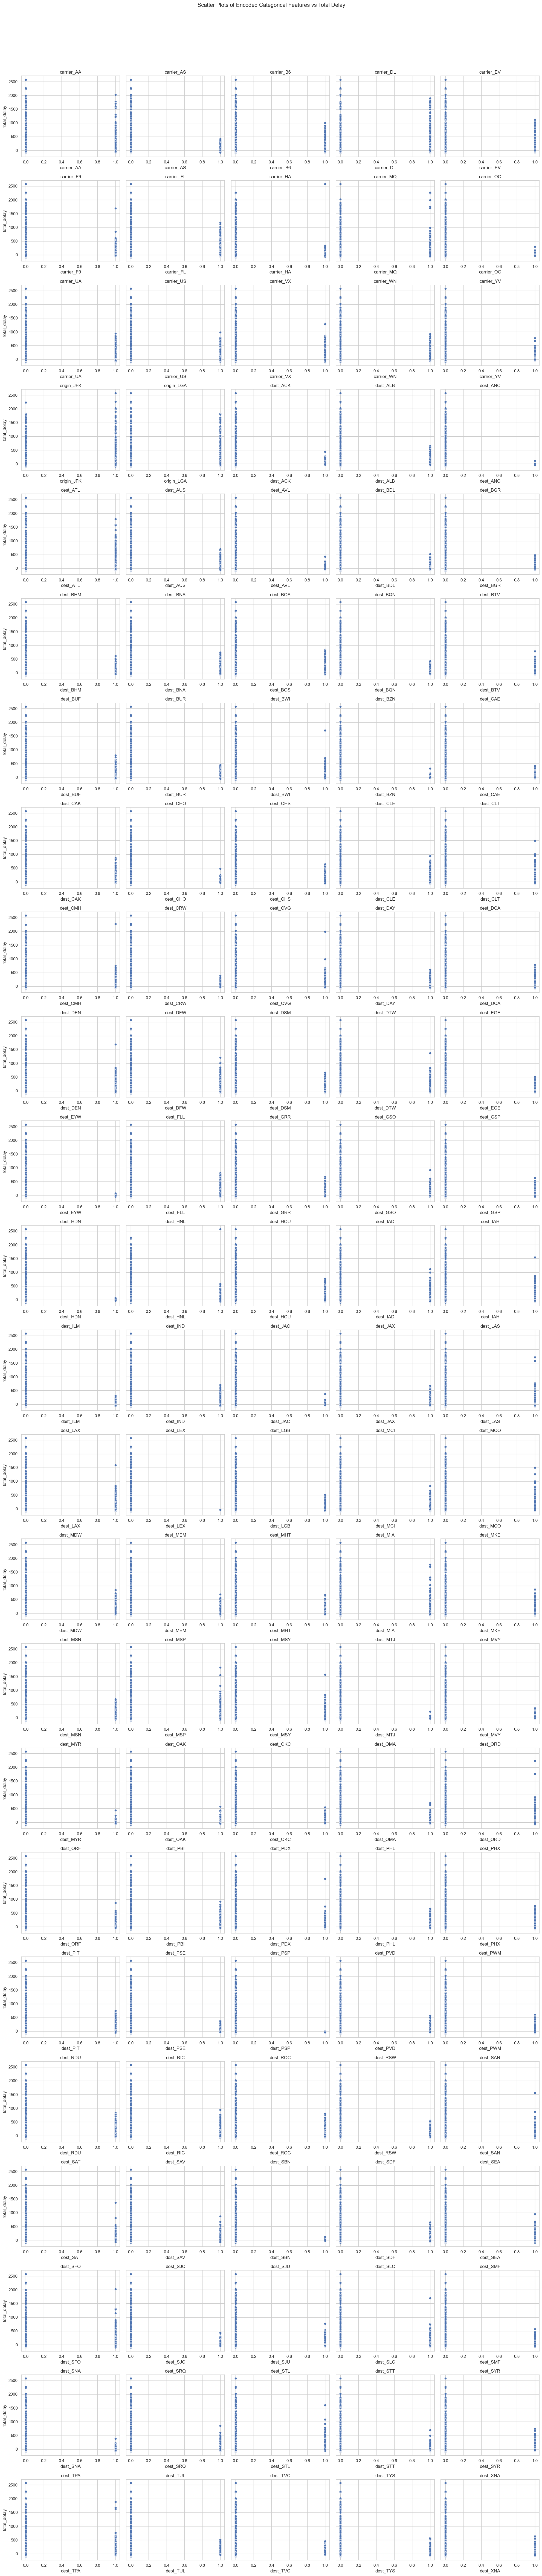

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# One-hot encode categorical features
categorical_features = ['carrier', 'origin', 'dest']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
target_column = 'total_delay'

# Display the first few rows of the encoded DataFrame
df_encoded.head()

# List of encoded categorical columns
encoded_categorical_columns = [col for col in df_encoded.columns if col.startswith(tuple(categorical_features))]

# Calculate the number of rows and columns needed for the subplot grid
num_features = len(encoded_categorical_columns)
num_cols = 5  # Number of columns in the grid
num_rows = (num_features // num_cols) + (1 if num_features % num_cols != 0 else 0)

# Create subplots for each encoded feature
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows), sharey=True)
fig.suptitle('Scatter Plots of Encoded Categorical Features vs Total Delay')

# Function to create scatter plots in subplots
def create_subplots(data, x_column, y_column, title, ax):
    sns.scatterplot(data=data, x=x_column, y=y_column, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)

# Create scatter plots for each encoded categorical feature
for i, col in enumerate(encoded_categorical_columns):
    row = i // num_cols
    col_num = i % num_cols
    create_subplots(df_encoded, col, target_column, col, axes[row, col_num])

# Hide any unused subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [23]:
# Detect outliers using IQR
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"Outliers in {feature}: {len(outliers)}")

Outliers in dep_delay: 43012
Outliers in arr_delay: 27880
Outliers in air_time: 5999
Outliers in distance: 713
Outliers in total_delay: 36493


In [43]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd  
import datetime 
import holidays

df = pd.read_csv('flights_EDA.csv')

us_holidays = holidays.US(years=[2013])


df['time_hour'] = pd.to_datetime(df['time_hour'])

df['date'] = df['time_hour'].dt.normalize()


df['is_holiday'] = df['date'].isin(us_holidays) 

C:\Users\Eric\AppData\Local\Temp\ipykernel_22176\2484941840.py:15: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_holiday'] = df['date'].isin(us_holidays)


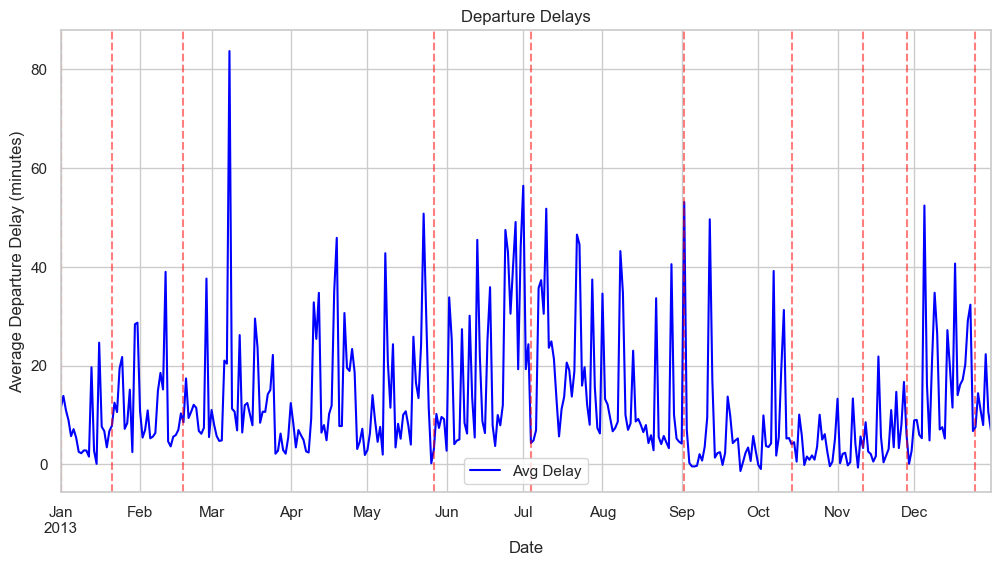

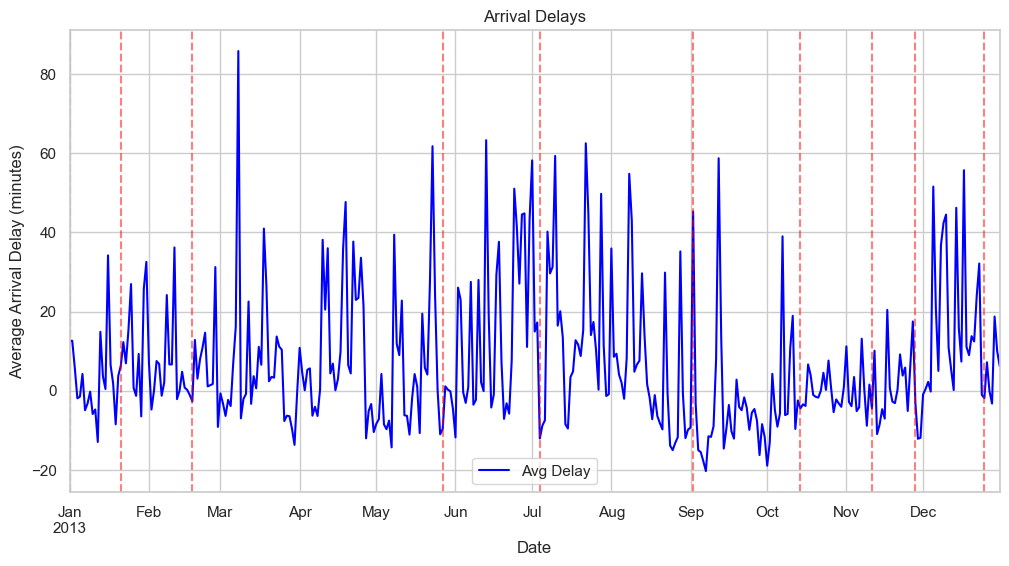

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

df.groupby('date')['dep_delay'].mean().plot(label="Avg Delay", color='blue')

holiday_dates = df[df['is_holiday']]['date'].unique()
for h_date in holiday_dates:
    plt.axvline(h_date, color='red', linestyle='--', alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Departure Delays")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

df.groupby('date')['arr_delay'].mean().plot(label="Avg Delay", color='blue')

holiday_dates = df[df['is_holiday']]['date'].unique()
for h_date in holiday_dates:
    plt.axvline(h_date, color='red', linestyle='--', alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Arrival Delays")
plt.legend()
plt.show()

In [46]:
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(categorize_season)


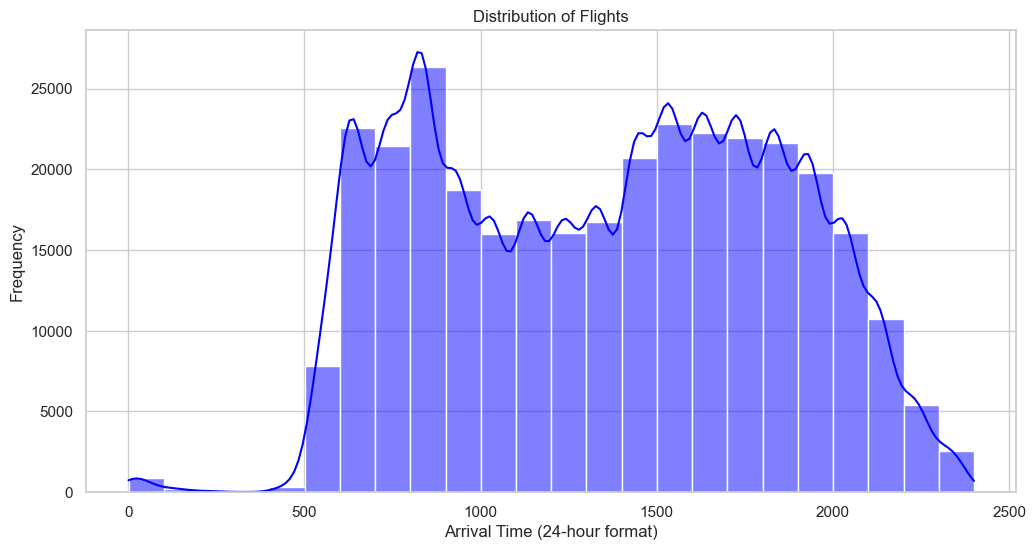

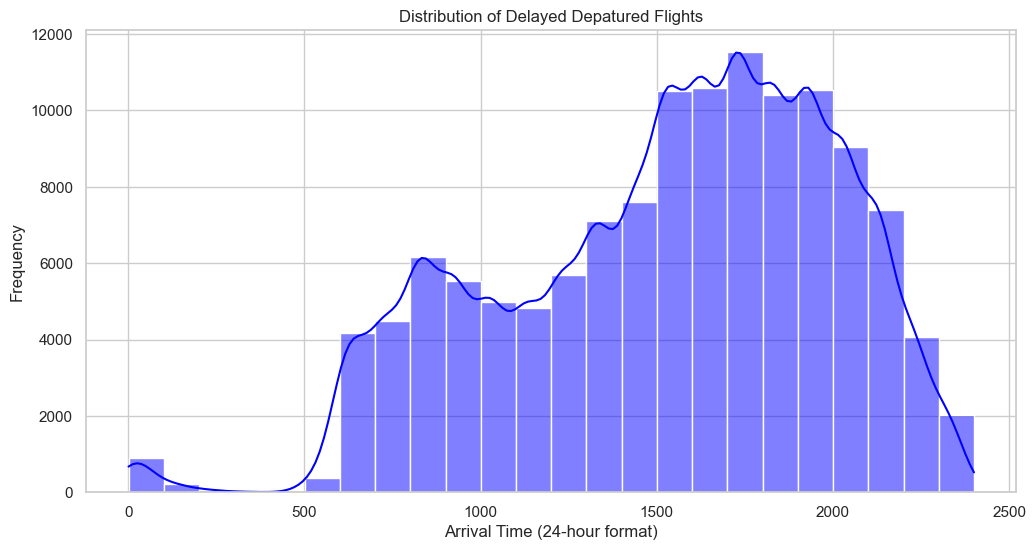

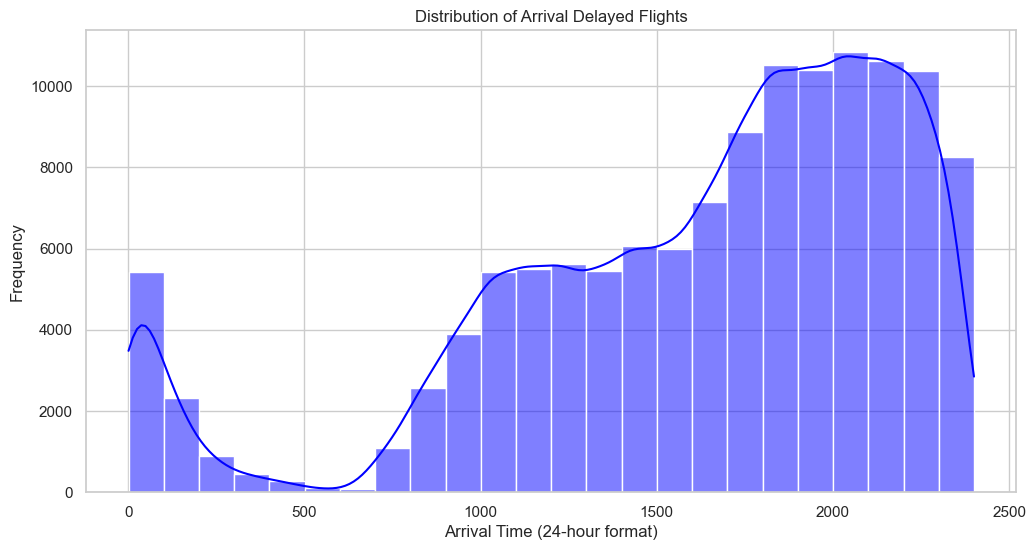

In [64]:
df_dep_delay = df[df['dep_delay'] > 0]
df_arr_delay = df[df['arr_delay'] > 0]

plt.figure(figsize=(12, 6))
sns.histplot(df['dep_time'], bins=24, kde=True, color='Blue')
plt.title('Distribution of Flights')
plt.xlabel('Arrival Time (24-hour format)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_dep_delay['dep_time'], bins=24, kde=True, color='Blue')
plt.title('Distribution of Delayed Depatured Flights')
plt.xlabel('Arrival Time (24-hour format)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_dep_delay['arr_time'], bins=24, kde=True, color='Blue')
plt.title('Distribution of Arrival Delayed Flights')
plt.xlabel('Arrival Time (24-hour format)')
plt.ylabel('Frequency')
plt.show()

In [65]:
# feature engineering for dep peak times
def dep_time_category(hour):
    if 0 <= hour < 600:
        return "early_morning"
    elif 600 <= hour < 1200:
        return "morning"
    elif 1200 <= hour < 1500:
        return "afternoon"
    elif 1500 <= hour < 2000:
        return "afternoon/evening_dep_rush"
    else:
        return 'evening'

# feature engineering for arr peak times
def arr_time_category(hour):
    if 0 <= hour < 100:
        return "early_morning_rush"
    elif 100 <= hour < 700:
        return "early_morning_slowdown"
    elif 700 <= hour < 1200:
        return "morning"
    elif 1200 <= hour < 1600:
        return "afternoon"
    elif 1600 <= hour < 2400:
        return "evening_rush"

# add the new column
df["dep_time_category"] = df["dep_time"].apply(dep_time_category)
df["arr_time_category"] = df["arr_time"].apply(dep_time_category)

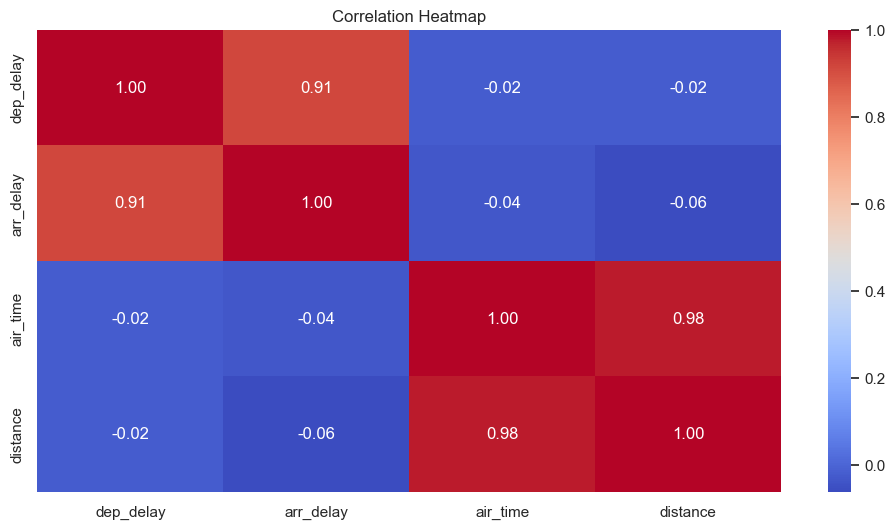

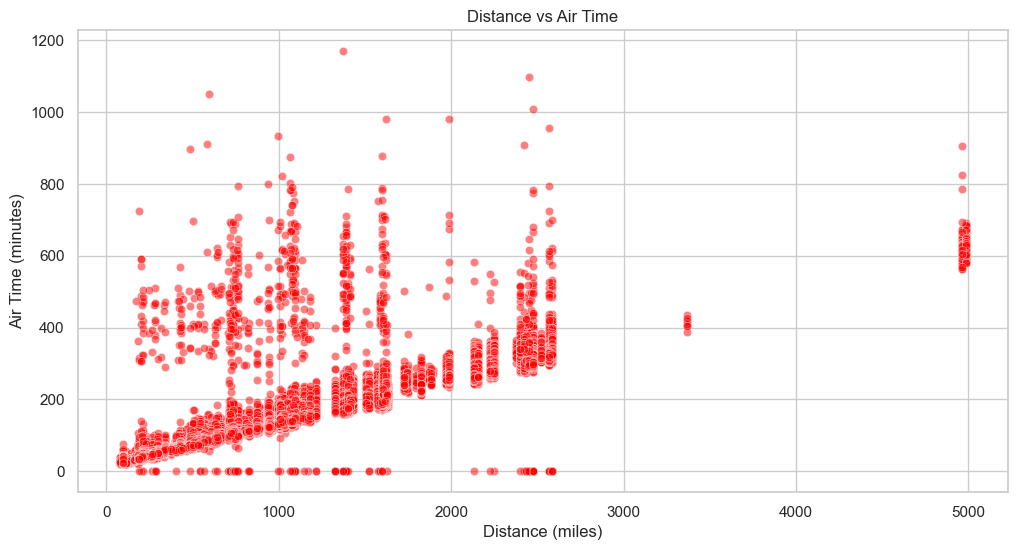

In [66]:
# coreelation analysis for delays and distance and airtime
plt.figure(figsize=(12, 6))
corr = df[['dep_delay', 'arr_delay', 'air_time', 'distance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# scatter plot for air time and distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance', y='air_time', data=df, alpha=0.5, color='red')
plt.title('Distance vs Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.show()



In [67]:
# remove noise
df = df[df['air_time'] > 0]

df.to_csv('flights_EDA.csv', index=False)

In [69]:
# weather airport dataset merge to main flights
df = pd.read_csv('flights_EDA.csv')
wdf = pd.read_csv('weather.csv')

df_weather_merge = pd.merge(df, wdf, on=['origin', 'month', 'day', 'hour', 'year'])

df_weather_merge.to_csv('merged_flight_weather_data.csv', index=False)




In [70]:
from sklearn.impute import KNNImputer
df_flights_weather = pd.read_csv('merged_flight_weather_data.csv')

missing_values = df_flights_weather.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

missing_columns = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'pressure']

# filling the missing values for wind_gust column from the dataset merge
imputer = KNNImputer(n_neighbors=5)
df_flights_weather[missing_columns] = imputer.fit_transform(df_flights_weather[missing_columns])

df_flights_weather.to_csv('merged_flight_weather_data_knn.csv', index=False)

temp              17
dewp              17
humid             17
wind_dir        8064
wind_speed        78
wind_gust     248856
pressure       34682
dtype: int64


In [71]:
df_flights_weather = pd.read_csv('merged_flight_weather_data_knn.csv')
missing_values = df_flights_weather.isnull().sum()
print(missing_values)

id                   0
year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour_x          0
name                 0
flight_status        0
total_delay          0
date                 0
is_holiday           0
season               0
day_of_week          0
is_saturday          0
day_x                0
day_y                0
month_x              0
month_y              0
dep_time_category    0
arr_time_category    0
temp                 0
dewp                 0
humid                0
wind_dir             0
wind_speed           0
wind_gust            0
precip               0
pressure             0
visib                0
time_hour_y

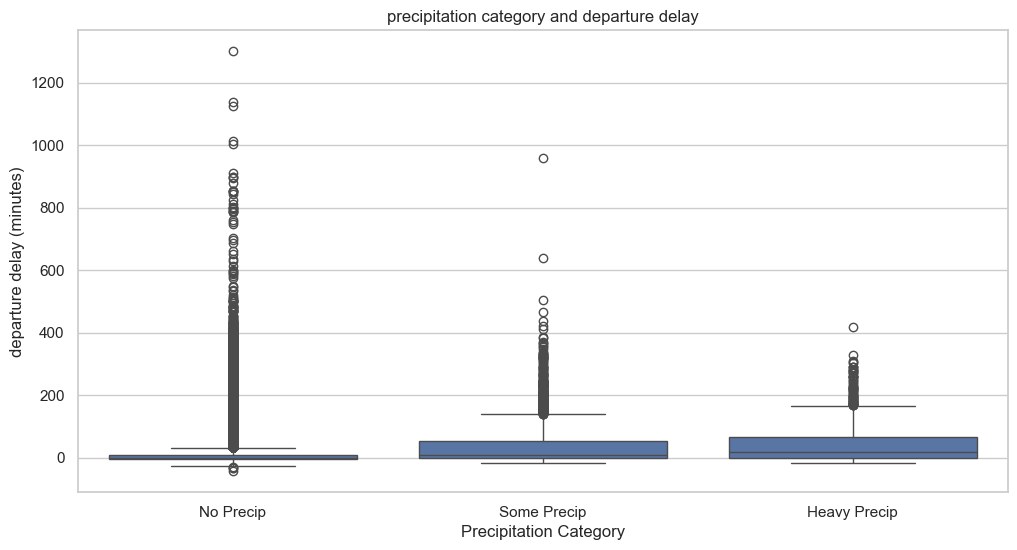

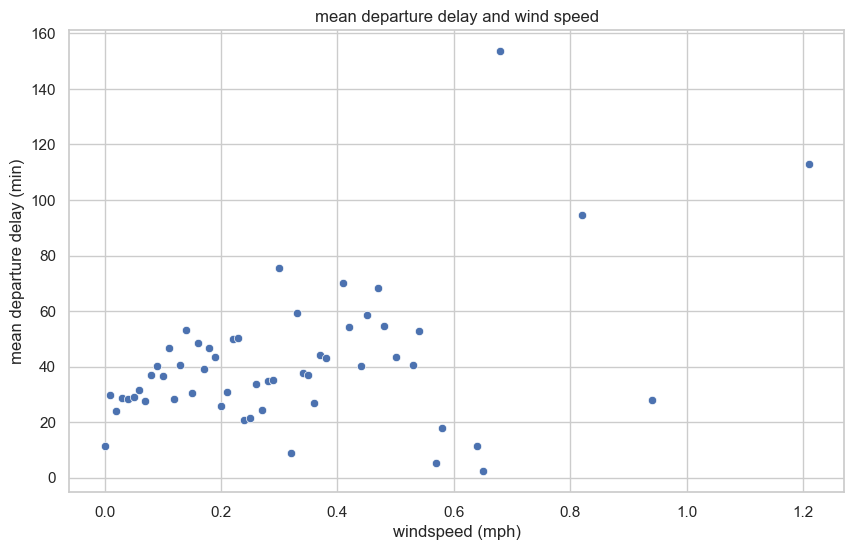

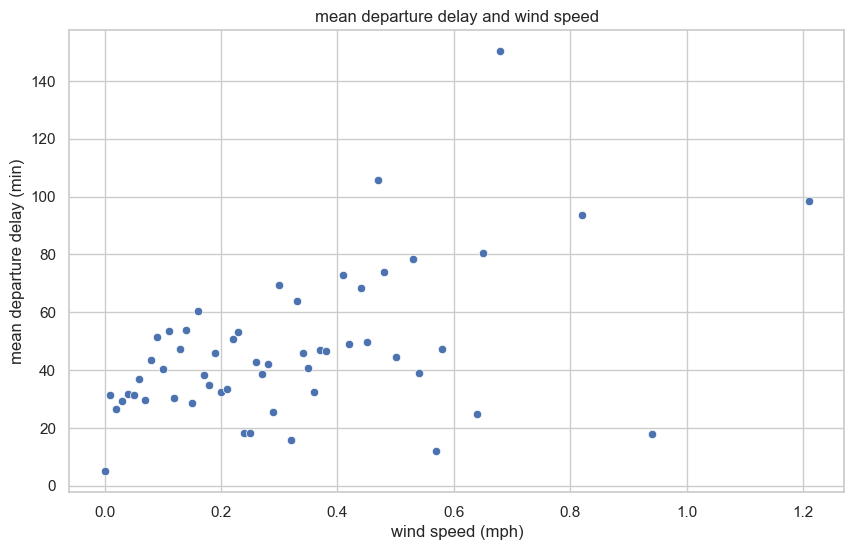

In [72]:
import pandas as pd

df_flights_weather = pd.read_csv('merged_flight_weather_data_knn.csv')

# bin the precipitation values into categories
df_flights_weather['precip_category'] = pd.cut(df_flights_weather['precip'], bins=[0, 0.1, 0.3, float('inf')], labels=['No Precip', 'Some Precip', 'Heavy Precip'], right=False)

#boxplot them
plt.figure(figsize=(12, 6))
sns.boxplot(x='precip_category', y='dep_delay', data=df_flights_weather)
plt.title('precipitation category and departure delay')
plt.xlabel('Precipitation Category')
plt.ylabel('departure delay (minutes)')
plt.show()

#get the depature delay mean for precip values
mean_dep_delay_percip = df_flights_weather.groupby('precip')['dep_delay'].mean().reset_index()

# plot them against dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='dep_delay', data=mean_dep_delay_percip)
plt.title('mean departure delay and wind speed')
plt.xlabel('windspeed (mph)')
plt.ylabel('mean departure delay (min)')
plt.show()

#get the depature delay mean for precip values
mean_arr_delay_percip = df_flights_weather.groupby('precip')['arr_delay'].mean().reset_index()
# plot them against arr delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='arr_delay', data=mean_arr_delay_percip)
plt.title('mean departure delay and wind speed')
plt.xlabel('wind speed (mph)')
plt.ylabel('mean departure delay (min)')
plt.show()

df_flights_weather['precip_category'] = pd.cut(df_flights_weather['precip'], bins=[0, 0.1, 0.3, float('inf')], labels=['No Precip', 'Some Precip', 'Heavy Precip'], right=False)

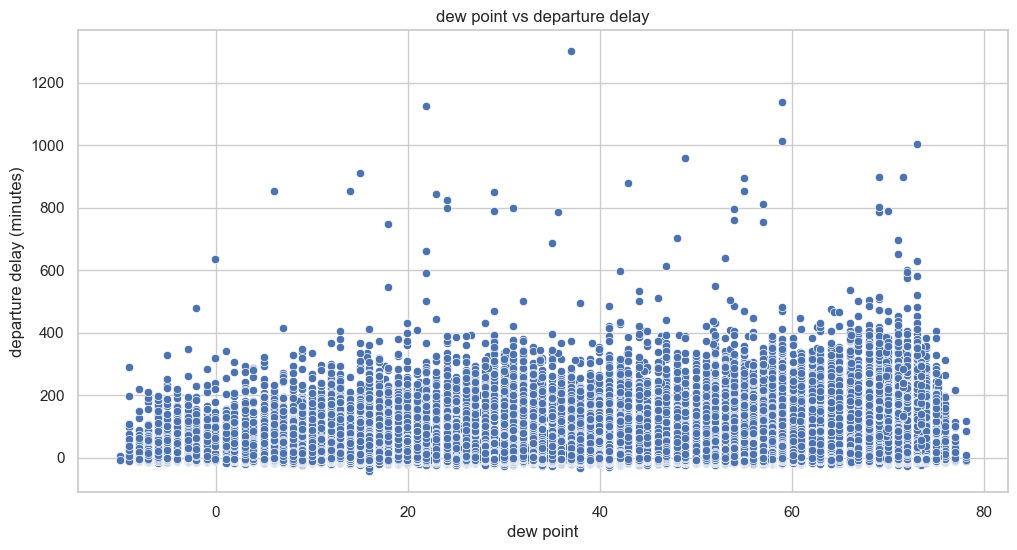

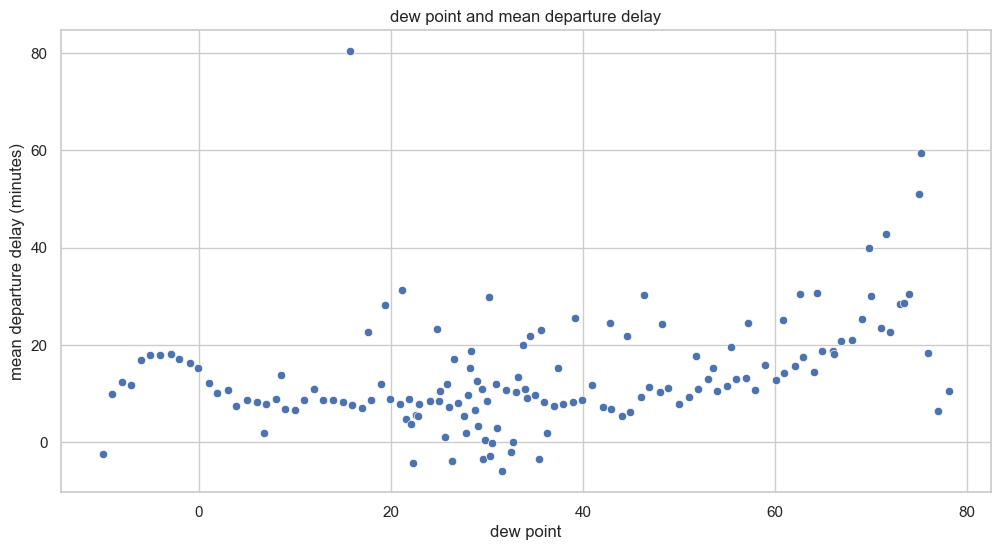

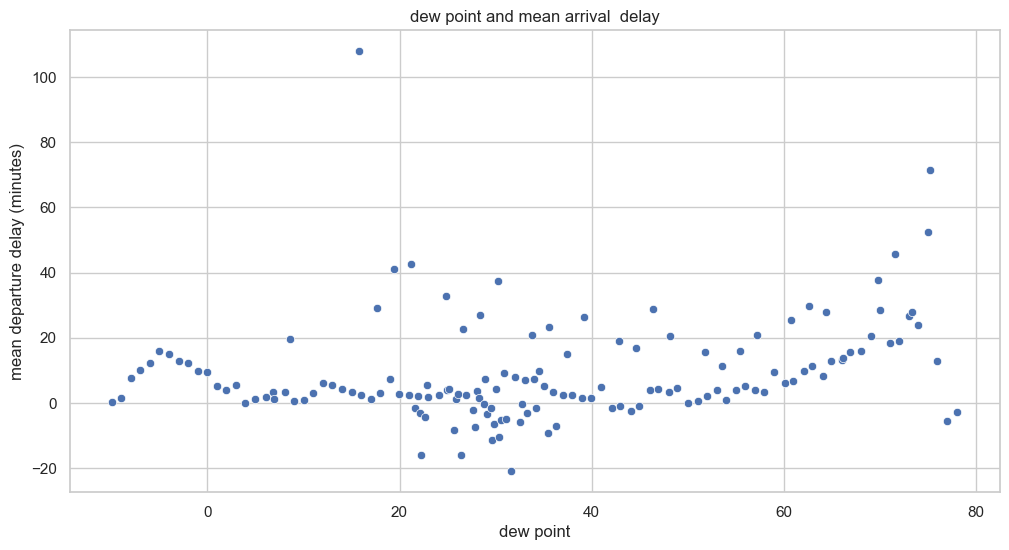

In [73]:
# plot dewpoint and departure delays
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dewp', y='dep_delay', data=df_flights_weather)
plt.title('dew point vs departure delay')
plt.xlabel('dew point')
plt.ylabel('departure delay (minutes)')
plt.show()

# mean dep delay for dewpoint values
mean_dep_delay_dewp = df_flights_weather.groupby("dewp")["dep_delay"].mean().reset_index()

# plot dew point and mean dep delay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dewp', y='dep_delay', data=mean_dep_delay_dewp)
plt.title('dew point and mean departure delay')
plt.xlabel('dew point')
plt.ylabel('mean departure delay (minutes)')
plt.show()

mean_arr_delay_dewp = df_flights_weather.groupby('dewp')['arr_delay'].mean().reset_index()

# plot dew point and mean arrival delay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dewp', y='arr_delay', data=mean_arr_delay_dewp)
plt.title('dew point and mean arrival  delay')
plt.xlabel('dew point')
plt.ylabel('mean departure delay (minutes)')
plt.show()

In [ ]:
# dep delay mean for visibility values
mean_dep_delay_visib = df_flights_weather.groupby('visib')['dep_delay'].mean().reset_index()

# plot of visibility and dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visib', y='dep_delay', data=mean_dep_delay_visib)
plt.title('mean departure delay and visibility')
plt.xlabel('visibility')
plt.ylabel('mean departure delay (minutes)')
plt.show()

# bin the visibility values into categorical attributes for feature engieering
wind_visb_bin = [-float('inf'), 2, 4, 6, 8, float('inf')]
wind_visb_label = ['Very Bad', 'Bad', 'Moderate', 'Good', 'Very Good']

mean_dep_delay_visib['visib_category'] = pd.cut(mean_dep_delay_visib['visib'], bins=wind_visb_bin, labels=wind_visb_label)

# show the bins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visib', y='dep_delay', data=mean_dep_delay_visib, hue="visib_category", palette="coolwarm")
plt.title('mean departure delay and visibility')
plt.xlabel('visibility')
plt.ylabel('mean departure delay (minutes)')
plt.legend(title='wind_speed_category')
plt.show()

# add new category
df_flights_weather['visib_category'] = pd.cut(df_flights_weather['visib'], bins=wind_visb_bin, labels=wind_visb_label)
# df_weather.to_csv('df_weather.csv', index=False)

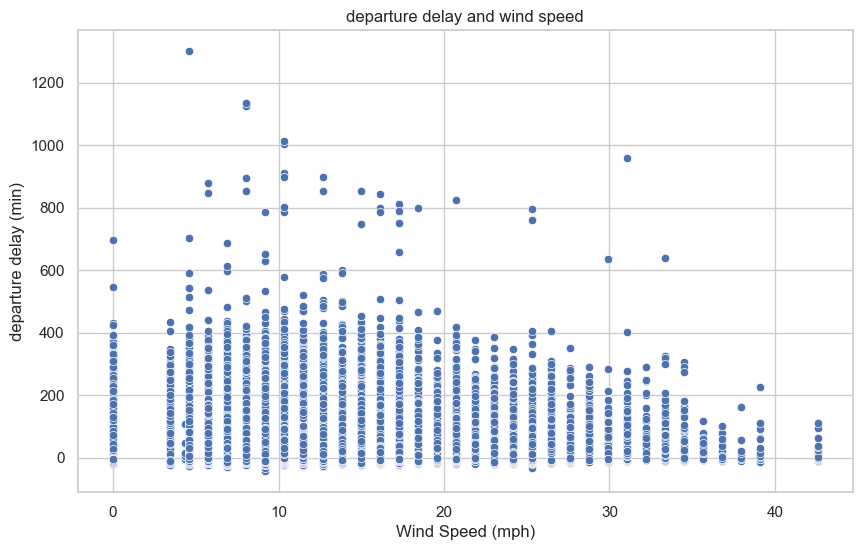

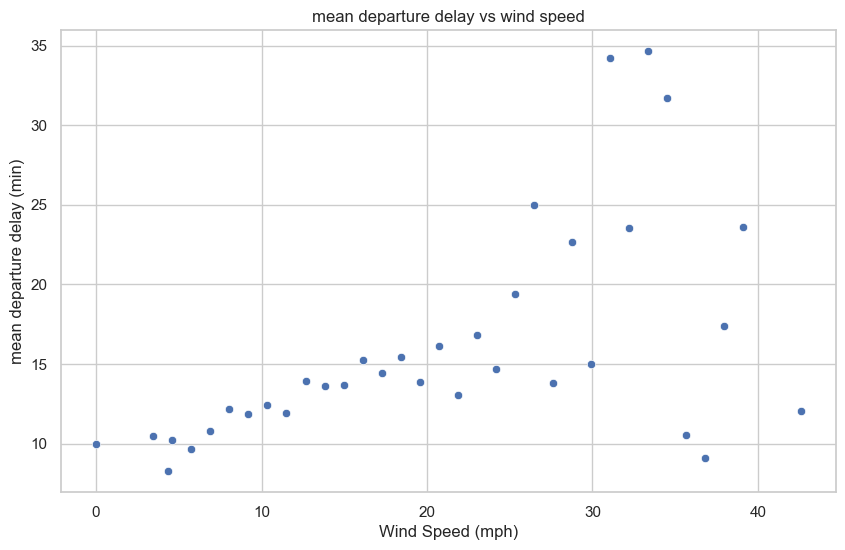

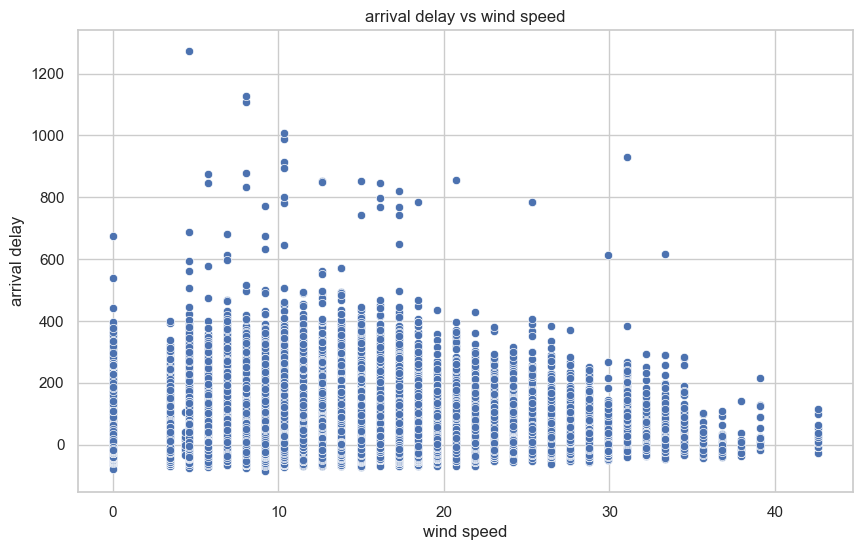

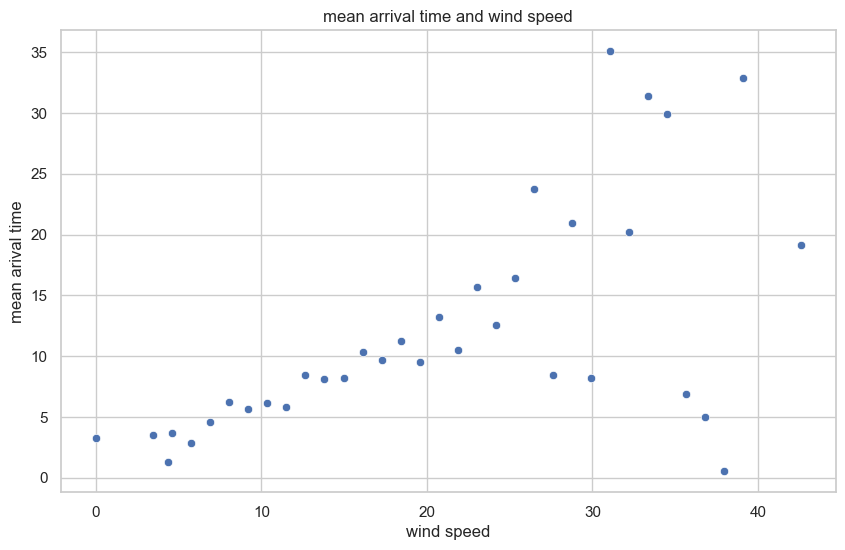

In [74]:
# plot the wind speed and dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='dep_delay', data=df_flights_weather)
plt.title('departure delay and wind speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('departure delay (min)')
plt.show()

mean_dep_delay_wind_speed = df_flights_weather.groupby('wind_speed')['dep_delay'].mean().reset_index()

# plot the mean dep_delay and wind_speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='dep_delay', data=mean_dep_delay_wind_speed)
plt.title('mean departure delay vs wind speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('mean departure delay (min)')
plt.show()

# plot the arr_delay and wind_speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='arr_delay', data=df_flights_weather)
plt.title('arrival delay vs wind speed')
plt.xlabel('wind speed')
plt.ylabel('arrival delay')
plt.show()

mean_arr_delay_wind_speed = df_flights_weather.groupby('wind_speed')['arr_delay'].mean().reset_index()

# plot mean arr_delay and wind_speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='arr_delay', data=mean_arr_delay_wind_speed)
plt.title('mean arrival time and wind speed')
plt.xlabel('wind speed')
plt.ylabel('mean arival time')
plt.show()


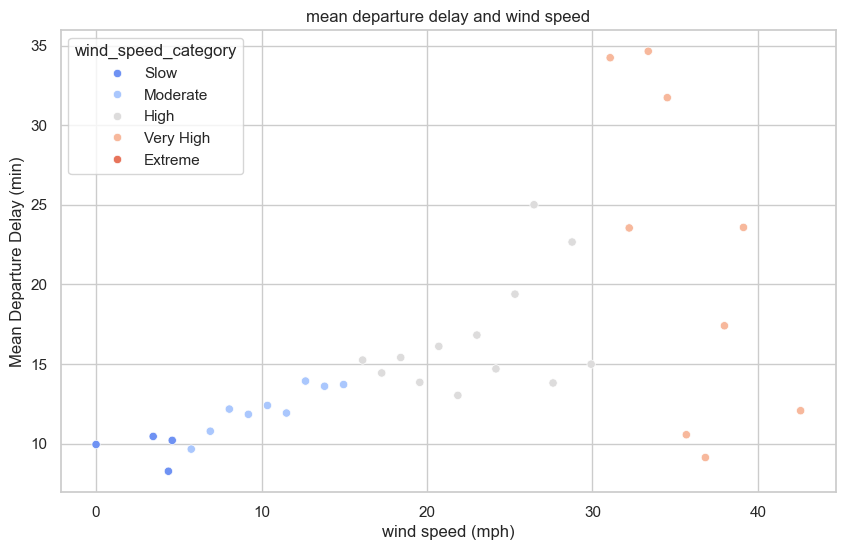

In [75]:
# create the bin for the wind gust value
wind_speed_bin = [-float('inf'), 5, 15, 30, 50, float('inf')]
wind_speed_label = ['Slow', 'Moderate', 'High', 'Very High', 'Extreme']


mean_dep_delay_wind_speed['wind_speed_category'] = pd.cut(mean_dep_delay_wind_speed['wind_speed'], bins=wind_speed_bin, labels=wind_speed_label)

# plot wind speed and mean dep delay bin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='dep_delay', data=mean_dep_delay_wind_speed, hue='wind_speed_category', palette='coolwarm')
plt.title('mean departure delay and wind speed')
plt.xlabel('wind speed (mph)')
plt.ylabel('Mean Departure Delay (min)')
plt.legend(title='wind_speed_category')
plt.show()

df_flights_weather['wind_speed_category'] = pd.cut(df_flights_weather['wind_speed'], bins=wind_speed_bin, labels=wind_speed_label)

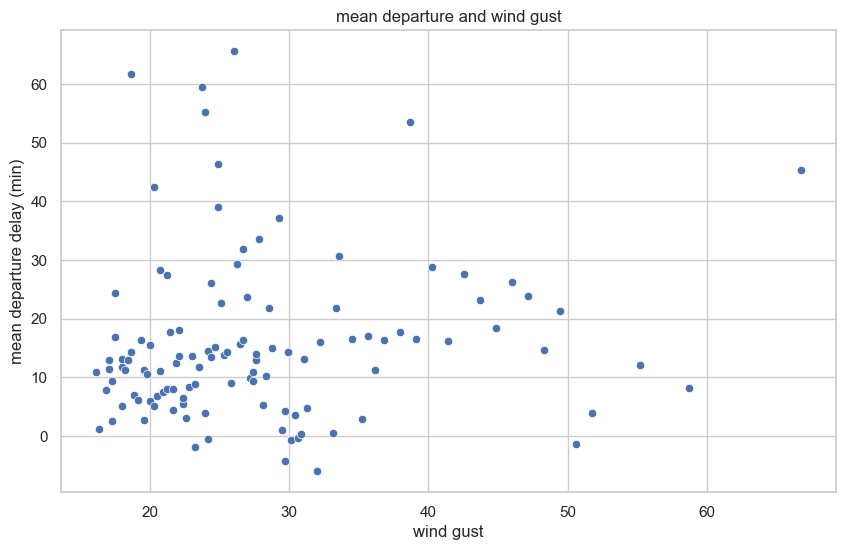

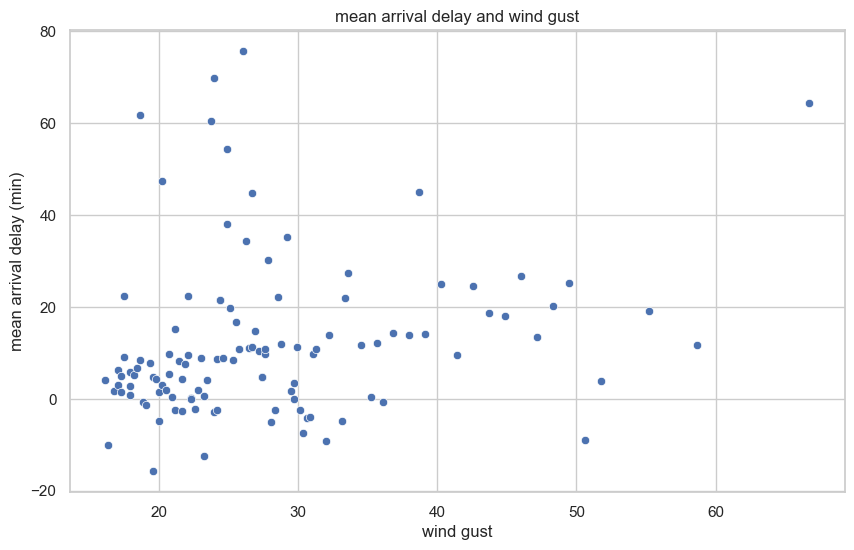

ValueError: Could not interpret value `dep_delay` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [76]:


mean_dep_delay_wind_gust= df_flights_weather.groupby("wind_gust")["dep_delay"].mean().reset_index()
mean_arr_delay_wind_gust= df_flights_weather.groupby("wind_gust")["arr_delay"].mean().reset_index()
# plot wind gust and mean dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x="wind_gust", y="dep_delay", data=mean_dep_delay_wind_gust)
plt.title('mean departure and wind gust')
plt.xlabel('wind gust')
plt.ylabel('mean departure delay (min)')
plt.show()

# plot wind gust and mean arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_gust', y='arr_delay', data=mean_arr_delay_wind_gust)
plt.title('mean arrival delay and wind gust')
plt.xlabel('wind gust')
plt.ylabel('mean arrival delay (min)')
plt.show()

# bin the wind gust to categories
wind_gust_bin = [-float('inf'), 20, 40, 50, 80, float('inf')]
wind_gust_label = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

mean_dep_delay_wind_gust['wind_gust_category'] = pd.cut(mean_dep_delay_wind_gust['wind_gust'], bins=wind_gust_bin, labels=wind_gust_label)

# plot wind guest and mean dep delay bin
plt.figure(figsize=(10, 6))
sns.scatterplot(x="wind_gust", y="dep_delay", data=mean_arr_delay_wind_gust, hue="wind_gust_category", palette="coolwarm")
plt.title('mean departure delay and wind gust')
plt.xlabel('wind gust')
plt.ylabel('mean departure delay (min)')
plt.legend(title='wind_gust_category')
plt.show()

df_flights_weather['wind_gust_category'] = pd.cut(df_flights_weather['wind_gust'], bins=wind_gust_bin, labels=wind_gust_label)

In [ ]:
# plot the temp and departure delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x="temp", y="dep_delay", data=df_flights_weather)
plt.title("departure delay and temp")
plt.xlabel("temp in F")
plt.ylabel('departure delay (min)')
plt.show()

mean_dep_delay_temp = df_flights_weather.groupby('temp')['dep_delay'].mean().reset_index()

# plot the temp and dep delay mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='dep_delay', data=mean_dep_delay_temp)
plt.title('mean departure delay and temperature')
plt.xlabel('temp in F')
plt.ylabel('mean departure delay (min)')
plt.show()

# bin the temps to categories
bins = [-float('inf'), 32, 50, 68, 85, float('inf')]
labels = ['Very Cold', 'Cold', 'Warm', 'Hot', 'Very Hot']

mean_dep_delay_temp['temp_category'] = pd.cut(mean_dep_delay_temp['temp'], bins=bins, labels=labels)

# plot the bin of temp and dep_delay mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='dep_delay', data=mean_dep_delay_temp, hue='temp_category', palette="coolwarm")
plt.title('mean departure delay and temperature')
plt.xlabel('temp in F')
plt.ylabel('mean departure delay (min)')
plt.legend(title='temp_category')
plt.show()

df_flights_weather['temp_category'] = pd.cut(df_flights_weather['temp'], bins=bins, labels=labels)

In [ ]:
mean_dep_delay_wind_dir= df_flights_weather.groupby('wind_dir')['dep_delay'].mean().reset_index()
mean_arr_delay_wind_dir= df_flights_weather.groupby('wind_dir')['arr_delay'].mean().reset_index()
# plot the mean of departure delay and wind direction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_dir', y='dep_delay', data=mean_dep_delay_wind_dir)
plt.title('mean departure delay and wind direction')
plt.xlabel('wind direction')
plt.ylabel('mean departure delay (min)')
plt.show()

# plot the mean of arrival delay and wind direction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_dir', y='arr_delay', data=mean_arr_delay_wind_dir)
plt.title('mean arrival delay and wind direction')
plt.xlabel('wind direction')
plt.ylabel('mean departure delay (min)')
plt.show()



In [ ]:
mean_dep_delay_pressure= df_flights_weather.groupby('pressure')['dep_delay'].mean().reset_index()
mean_arr_delay_pressure= df_flights_weather.groupby('pressure')['arr_delay'].mean().reset_index()

# plot the pressure and dep delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pressure', y='dep_delay', data=mean_dep_delay_pressure)
plt.title('mean departure delay and pressure')
plt.xlabel("pressure")
plt.ylabel('mean departure delay (min)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="pressure", y="arr_delay", data=mean_arr_delay_pressure)
plt.title('mean arrival delay and pressure')
plt.xlabel('pressure')
plt.ylabel('mean arrival delay (min)')
plt.show()


# create the bins for pressure
bins = [-float('inf'), 1000, 1020, 1030, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High']


mean_dep_delay_pressure['pressure_category'] = pd.cut(mean_dep_delay_pressure['pressure'], bins=bins, labels=labels)


# plot dep delay mean and the pressure bin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pressure', y='dep_delay', data=mean_dep_delay_pressure, hue='pressure_category', palette="coolwarm")
plt.title('mean departure delay and presssure')
plt.xlabel('pressure')
plt.ylabel("mean departure delay (min)")
plt.legend(title='pressure_category')
plt.show()



In [ ]:
import os

df_flights_weather = df_flights_weather[df_flights_weather['air_time'] > 0]

def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'  # Handle unexpected values

df_flights_weather['season'] = df_flights_weather['month'].apply(categorize_season)

# Check if file exists before saving
file_path = 'feature_engineering.csv'
if not os.path.exists(file_path):
    df_flights_weather.to_csv(file_path, index=False)
    print(f"File '{file_path}' saved successfully.")
else:
    print(f"File '{file_path}' already exists. No changes were made.")


In [81]:
import pandas as pd

# Load your dataset (if not already loaded)
df = pd.read_csv('feature_engineering.csv')

# Print all column names
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour', 'name', 'flight_status', 'total_delay', 'date', 'is_holiday', 'season', 'day_of_week', 'is_saturday']


In [77]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Cyclical Encoding for 'day' and 'month'
def convert_to_circle(column, max_value):
    """Convert a column to cyclical features using sine and cosine."""
    angle = 2 * np.pi * (column - 1) / max_value  # Calculate the angle
    x = np.cos(angle)  # x-coordinate on the unit circle
    y = np.sin(angle)  # y-coordinate on the unit circle
    return x, y

# Extract features from the datetime column
df['hour'] = df['time_hour'].dt.hour
df['day_of_week'] = df['time_hour'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['time_hour'].dt.month

# Apply cyclical encoding to 'day_of_week' and 'month'
df['day_x'], df['day_y'] = convert_to_circle(df['day_of_week'], 7)  # 7 days in a week
df['month_x'], df['month_y'] = convert_to_circle(df['month'], 12)  # 12 months in a year

# Define categorical features for OneHotEncoding
categorical_features = ['carrier', 'origin', 'dest', 'flight_status', 'tailnum']

# Define numerical features (excluding datetime columns)
numerical_features = ['dep_time', 'arr_time', 'air_time', 'distance', 'hour', 'day_x', 'day_y', 'month_x', 'month_y']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ],
    remainder='passthrough'  # Pass through numerical features unchanged
)

# Separate features (X) and target (y)
# Ensure we only include categorical and numerical features in X
X = df[categorical_features + numerical_features]
y = df['total_delay']  # Target column

# Apply the preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Print the shape of the preprocessed data
print("\nShape of preprocessed features (X_preprocessed):", X_preprocessed.shape)
print("\nFirst 5 rows of preprocessed features:")
print(X_preprocessed[:5])  # Print the first 5 rows of the preprocessed data

AttributeError: Can only use .dt accessor with datetimelike values

In [54]:
print("Target variable (total_delay) statistics:")
print(df['total_delay'].describe())

Target variable (total_delay) statistics:
count    328063.000000
mean         19.456281
std          82.820361
min        -100.000000
25%         -21.000000
50%          -6.000000
75%          22.000000
max        2573.000000
Name: total_delay, dtype: float64


In [55]:
# Check the columns in X_preprocessed
print("Columns in X_preprocessed:")
print(preprocessor.get_feature_names_out())

# Ensure 'total_delay' is not in X_preprocessed
assert 'total_delay' not in preprocessor.get_feature_names_out()

Columns in X_preprocessed:
['cat__carrier_9E' 'cat__carrier_AA' 'cat__carrier_AS' ...
 'remainder__day_y' 'remainder__month_x' 'remainder__month_y']


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 77.04978486732645


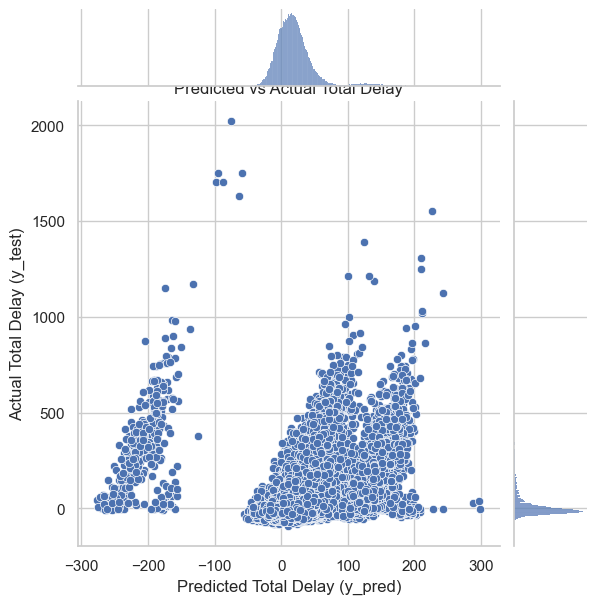

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

def sns_jointplot(y_pred, y_test):
    sns.jointplot(x=y_pred, y=y_test, kind='scatter')
    plt.xlabel('Predicted Total Delay (y_pred)')
    plt.ylabel('Actual Total Delay (y_test)')
    plt.title('Predicted vs Actual Total Delay')
    plt.show()

sns_jointplot(y_pred, y_test)

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model with faster settings
rf_model = RandomForestRegressor(
    n_estimators=10,  # Use fewer trees
    max_depth=10,     # Limit tree depth
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 36.92453861551128


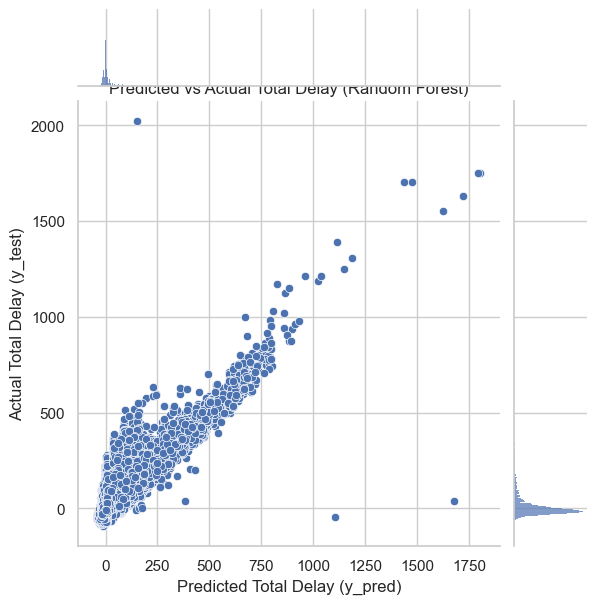

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create scatter plots
def sns_jointplot(y_pred, y_test, title):
    sns.jointplot(x=y_pred, y=y_test, kind='scatter')
    plt.xlabel('Predicted Total Delay (y_pred)')
    plt.ylabel('Actual Total Delay (y_test)')
    plt.title(title)
    plt.show()

    # Plot for Random Forest
sns_jointplot(y_pred_rf, y_test, title='Predicted vs Actual Total Delay (Random Forest)')

In [59]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 1.1 MB/s eta 0:02:12
   ---------------------------------------- 0.3/150.0 MB 2.7 MB/s eta 0:00:55
   ---------------------------------------- 1.2/150.0 MB 7.4 MB/s eta 0:00:21
    --------------------------------------- 2.9/150.0 MB 14.4 MB/s eta 0:00:11
   - -------------------------------------- 5.8/150.0 MB 23.3 MB/s eta 0:00:07
   -- ------------------------------------- 8.9/150.0 MB 29.9 MB/s eta 0:00:05
   -- ------------------------------------- 9.7/150.0 MB 30.8 MB/s eta 0:00:05
   --- ------------------------------------ 11.5/150.0 MB 43.5 MB/s eta 0:00:04
   ---- ----------------------------------- 15.8/150.0 MB 54.4 MB/s eta 0:00:03
   ---- ----------------------------------- 18.5/150.0 MB 50.4 MB/s eta 0:00:03
   ----- ---------------------------------- 19.3/150.0 MB 50.4 MB/s 

In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train an XGBoost Regression model
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,       # Maximum depth of each tree
    learning_rate=0.1, # Learning rate
    random_state=42,   # For reproducibility
    n_jobs=-1          # Use all CPU cores
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

XGBoost RMSE: 26.669468351844394


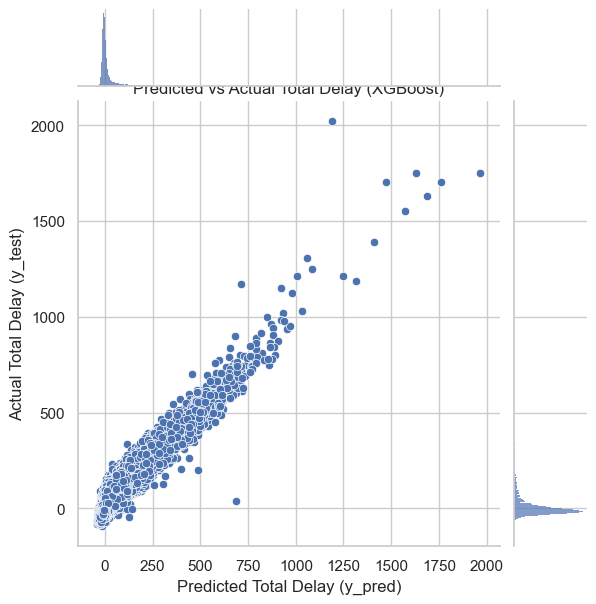

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create scatter plots
def sns_jointplot(y_pred, y_test, title):
    sns.jointplot(x=y_pred, y=y_test, kind='scatter')
    plt.xlabel('Predicted Total Delay (y_pred)')
    plt.ylabel('Actual Total Delay (y_test)')
    plt.title(title)
    plt.show()

# Plot for XGBoost
sns_jointplot(y_pred_xgb, y_test, title='Predicted vs Actual Total Delay (XGBoost)')